# HOUSE PRICE

In [1]:
# import file ke google colab
from google.colab import files
files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


{'test.csv': b'Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition\r\n1461,20,RH,80,11622,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0,TA,

In [2]:
import pandas as pd
import numpy as np

# baca data train dan test
test = pd.read_csv("/content/test.csv")
train = pd.read_csv("/content/train.csv")

# DATA UNDERSTANDING

### DATA UNDERSTANDING TRAIN


In [3]:
# Tampilkan tabel train
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# ukuran train
train.shape

(1460, 81)

In [5]:
# informasi train
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# fiture yg memiliki missing value
train.isnull().sum()[train.isnull().sum()>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [7]:
# deskripsi ttg train
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
# banyak fiture yg bertype data numerik
train_numerik = [var_x for var_x in train.columns
                    if train[var_x].dtype != "O"]
print("jumlah feature non-karakter yaitu    :", len(train_numerik))

# banyaknya fiture yg bertipe data katagorik
train_catagoric = [var_x for var_x in train.columns
                  if train[var_x].dtype == "O"]
print("jumlah feature karakter(objek) yaitu :", len(train_catagoric))

jumlah feature non-karakter yaitu    : 38
jumlah feature karakter(objek) yaitu : 43


In [9]:
# korelasi antar variabel terikan: SalePrice dengan variabel bebasnya
corr = train.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
corr[corr['Feature 1'] == 'SalePrice']

,Feature 1,Feature 2,Correlation Coefficient
0,SalePrice,SalePrice,1.000000
47,SalePrice,OverallQual,0.790982
49,SalePrice,GrLivArea,0.708624
58,SalePrice,GarageCars,0.640409
62,SalePrice,GarageArea,0.623431
66,SalePrice,TotalBsmtSF,0.613581
71,SalePrice,1stFlrSF,0.605852
88,SalePrice,FullBath,0.560664
102,SalePrice,TotRmsAbvGrd,0.533723
105,SalePrice,YearBuilt,0.522897


### DATA UNDERSTANDING TEST

In [10]:
# menampilkan tabel test
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [11]:
# info tentang test
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [12]:
# ukuran test
test.shape

(1459, 80)

In [13]:
# deskripsi ttg test
test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,1458.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1457.000000,1457.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.00000,1381.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,52.619342,554.294925,1046.117970,1156.534613,325.967786,3.543523,1486.045922,0.434454,0.065202,1.570939,0.377656,2.854010,1.042495,6.385195,0.58122,1977.721217,1.766118,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,176.753926,437.260486,442.898624,398.165820,420.610226,44.043251,485.566099,0.530648,0.252468,0.555190,0.503017,0.829788,0.208472,1.508895,0.64742,26.431175,0.775945,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.00000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,219.250000,784.000000,873.500000,0.000000,0.000000,1117.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.00000,1959.000000,1.000000,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,0.000000,460.000000,988.000000,1079.000000,0.000000,0.000000,1432.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,0.00000,1979.000000,2.000000,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,0.000000,797.750000,1305.000000,1382.500000,676.000000,0.000000,1721.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.00000,2002.000000,2.000000,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,2140.000000,5095.000000,5095.000000,1862.000000,1064.000000,5095.000000,3.000000,2.000000,4.000000,2.000000,6.000000,2.000000,15.000000,4.00000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [14]:
# featur yg memiliki missing value
test.isnull().sum()[test.isnull().sum()>0]

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

In [15]:
# banyak fiture yang memiliki type data numerik
test_numerik = [var_x for var_x in test.columns
                    if test[var_x].dtype != "O"]
print("jumlah feature numerik yaitu    :", len(test_numerik))

# banyak fiture yang memiliki type data numerik
test_catagorik = [var_x for var_x in test.columns
                 if test[var_x].dtype == "O"]
print("jumlah feature katagorik yaitu  :", len(test_catagorik))

jumlah feature numerik yaitu    : 37
jumlah feature katagorik yaitu  : 43


# DATA PREPARATION

### DATA PREPARATION TRAIN

PASTIKAN DATA MEMENUHI ASUMSI BERIKUT:
1.   LINIERITAS
2.   BERDISTRIBUSI NORMAL
3.   HETEROSKEDASTISITAS TIDAK TERJADI
4.   OUTLIER ~ IDN
5.   TIDAK TERJADI AUTOKORELASI

PENENTUAN VARIABEL:
1.   VARIABEL TERIKAT/TARGET : SalePrice
2.   VARIABEL BEBAS/FITURE   : SELAIN SalePrice dan Id

In [16]:
# import modul yg dibutuhkan
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.set_style("darkgrid")
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from scipy.stats import norm

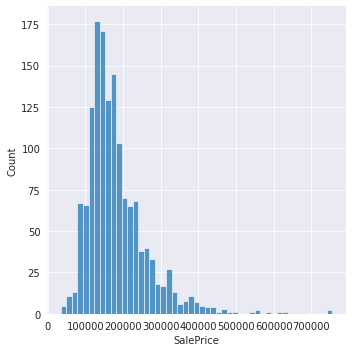

In [17]:
# lihat bentuk distribusi dari SalePrice, dengan melihat barplotnya
sns.displot(train["SalePrice"])


 mu = 180921.19589 and sigma = 79415.29189



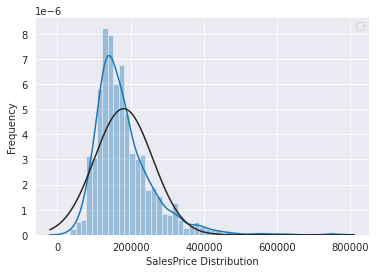

In [18]:
# bandingkan bentuk distribusi dari SalePrice dengan kurva distribusi normal yang baik
(mu, sigma) = norm.fit(train["SalePrice"])
print("\n mu = {:.5f} and sigma = {:.5f}\n". format(mu, sigma))

plt.legend(["Normal Distribution. ($\mu_$ {:.5f}) and $\sigma_$ {:.5f}". format (mu, sigma)], loc ='best')
sns.distplot(train["SalePrice"], fit=norm)
plt.ylabel('Frequency')
plt.xlabel('SalesPrice Distribution')
plt.show()

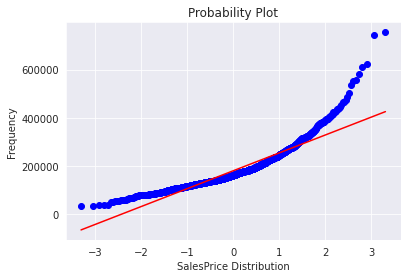

<Figure size 432x288 with 0 Axes>

In [19]:
# melihat sebaran data SalePrice dengan melihat scatter plotnya
stats.probplot(train['SalePrice'], plot=plt)
plt.ylabel('Frequency')
plt.xlabel('SalesPrice Distribution')
image = plt.figure()
plt.show()

#### catatan : 
1. karena distribusi dari SalePrice tidak sepenuhnya berbentuk linier, maka SalePrice harus dilinierkan agar model regresi linier dapat diterapkan
2. karena bentuk kurva distribusi SalePrice lebih condong ke kiri (substansial positif), maka SalePrice harus ditransformasikan dan karena didalam data SalePrice terdapat nilai nol, maka SalePrice akan ditransformasikan ke bentuk log(1+x).

In [20]:
# transormasi ke log(1+x)
import numpy as np
train["SalePrice"] = np.log1p(train["SalePrice"])
train["SalePrice"]

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1455    12.072547
1456    12.254868
1457    12.493133
1458    11.864469
1459    11.901590
Name: SalePrice, Length: 1460, dtype: float64

#### Cek kembali sebaran dan kurva SalePrice
untuk melihat apakah data SalePrice berdistribusi normal dan berbentuk linier

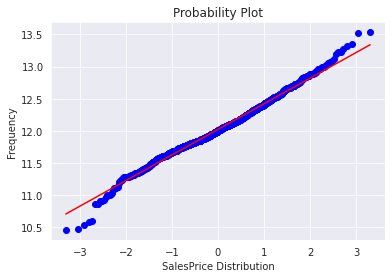

<Figure size 432x288 with 0 Axes>

In [21]:
# cek kembali linieritasnya
stats.probplot(train['SalePrice'], plot=plt)
plt.ylabel('Frequency')
plt.xlabel('SalesPrice Distribution')
image = plt.figure()
plt.show()


 mu = 12.02406 and sigma = 0.39931



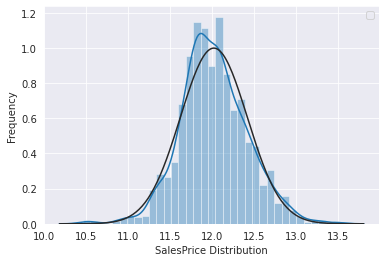

In [22]:
# cek kembali kurva distribusinya
(mu, sigma) = norm.fit(train["SalePrice"])
print("\n mu = {:.5f} and sigma = {:.5f}\n". format(mu, sigma))

plt.legend(["Normal Distribution. ($\mu_$ {:.5f}) and $\sigma_$ {:.5f}". format (mu, sigma)], loc ='best')
sns.distplot(train["SalePrice"], fit=norm)
plt.ylabel('Frequency')
plt.xlabel('SalesPrice Distribution')
plt.show()


asumsi linieritas dan normalitas SalePrice telah terpenuhi, bentuk dari sebaran datanya telah mendekati garis lurus(linier) dan kurna distribusi datanya telah mendekati kurva distribusi normal yang baik.

CEK OUTLIER DATA
mengecek outlier data dengan melihat boxplot dan identifikasi menggunakan standar deviasinya untuk melihat data mana saja yg merupakan outlier dengan menggunakan 97,5% data yang berada dalam tiga standar deviasi

{'boxes': [<matplotlib.lines.Line2D at 0x7f57be00a910>],
 'caps': [<matplotlib.lines.Line2D at 0x7f57be00e890>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f57be0138d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f57be013390>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f57be00add0>,
  <matplotlib.lines.Line2D at 0x7f57be00e350>]}

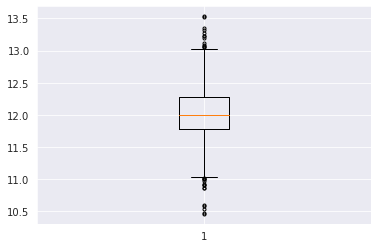

In [23]:
#  boxplot untuk mendeteksi outlier dengan menggunakan whiskers pada 1.5

plt.boxplot(train["SalePrice"], notch=False, sym='.', vert=True, whis=1.5,
        positions=None, widths=None, patch_artist=False,
        bootstrap=None, usermedians=None, conf_intervals=None)

In [24]:
# fungsi untuk mengidentifikasi outlier
import statistics
train_saleprice = train["SalePrice"]

def find_anomalies(train_saleprice):
    anomalies=[]
    
    std_train_saleprice = statistics.stdev(train["SalePrice"])
    mean_train_saleprice = statistics.mean(train["SalePrice"])
    anomalies_cut_of = std_train_saleprice*3
    
    lower_limit = mean_train_saleprice - anomalies_cut_of
    upper_limit = mean_train_saleprice + anomalies_cut_of
    
    print(lower_limit)
    print(upper_limit)
    print("")
    
    for outlier in train_saleprice:
        if outlier > upper_limit or outlier < lower_limit:
            anomalies.append(outlier)
    return anomalies

find_anomalies(train_saleprice)

10.825709574950885
13.222405214885924



[10.596659732783579,
 13.22672519452875,
 10.460270761075149,
 10.579005242826247,
 13.534474352733596,
 13.275829251377,
 13.323928581764989,
 10.471978128496518,
 10.542732775946709,
 13.229569788348705,
 13.345508528717259,
 13.521140839642674]

Dari hasil perhitungan dan boxplot dapat dilihat bahwa terdapat outlier, sehingga outlier harus dihandling agar model yang dihasilkan baik.

#### Catatan :
cara menghandling outlier yaitu:


1.   Hapus/remove outlier, jika outlier merupakan data error
2.   Abaikan outlier, jika bukan data error dan tidak terlalu menggangu
3.   Scalling (Normalization), dengan mengubah standar deviasinya menjadi satu (Std = 1)
4.   Centering (Standarization), dengan mengubah mean menjadi nol (mean=0)


In [25]:
# hitung batas atas dan bawah data
import statistics
std_train_saleprice = statistics.stdev(train["SalePrice"])
mean_train_saleprice = statistics.mean(train["SalePrice"])
anomalies_cut_of = std_train_saleprice*3
    
lower_limit = mean_train_saleprice - anomalies_cut_of
upper_limit = mean_train_saleprice + anomalies_cut_of

# hapus data outlier
train = train.drop(train[(train['SalePrice']<lower_limit)&(train['SalePrice']>upper_limit)].index)

# ukuran train setelah diremove
train.shape


(1460, 81)

# FEATURE ANGINEERING
1. Buat data baru yg berisi Id dari tabel train dan test, dan hapus kolom Id 
2. dalam tabel train dan test
3. buat data baru yg berisi SalePrice, dan hapus kolom SalePrice dalam tabel train
4. gabungkan tabel train dan test gabungkan tabel train dan test kedalam satu dataframe yang sama

In [26]:
ntrain = train.shape[0]
ntest = test.shape[0]
train_id = train["Id"]
test_id = test["Id"]
train_saleprice = train["SalePrice"]

y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
all_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,

In [27]:
print("ukuran train       :", format(train.shape))
print("ukuran test        :", format(test.shape))
print("ukuran total data  :", format(all_data.shape))

ukuran train       : (1460, 81)
ukuran test        : (1459, 80)
ukuran total data  : (2919, 80)


# Handling missing value

isi missing value yg ada dalam setiap kolom tabel gabungan

In [28]:
all_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [29]:
# menampilkan feature yang memiliki missing value
all_data.isnull().sum()[all_data.isnull().sum()>0]

MSZoning           4
LotFrontage      486
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
dtype: int64

In [30]:
# jumlah feature yg memiliki missing value
print("total feature yg memiliki missing value : ", len(all_data.isnull().sum()[all_data.isnull().sum()>0]))

total feature yg memiliki missing value :  34


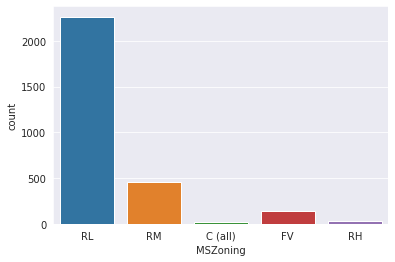

In [31]:
# KATEGORIKAL
sns.countplot(all_data["MSZoning"])
all_data["MSZoning"] = all_data["MSZoning"].fillna(all_data["MSZoning"].mode()[0])

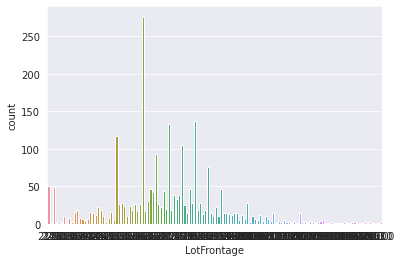

In [32]:
# NUMERIKAL
sns.countplot(all_data["LotFrontage"])
all_data["LotFrontage"] = all_data["LotFrontage"].fillna(all_data["LotFrontage"].mean())

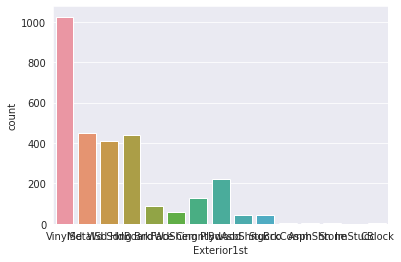

In [33]:
# KATAGORIKAL
sns.countplot(all_data["Exterior1st"])
all_data["Exterior1st"] = all_data["Exterior1st"].fillna(all_data["Exterior1st"].mode()[0])

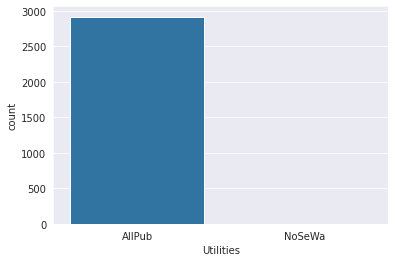

In [34]:
# KATAGORIKAL
sns.countplot(all_data["Utilities"])
all_data["Utilities"] = all_data["Utilities"].fillna(all_data["Utilities"].mode()[0])

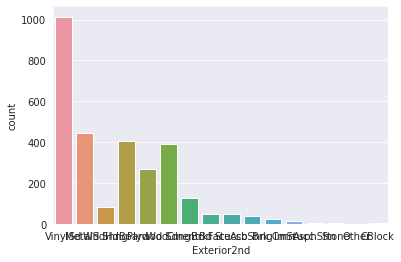

In [35]:
# KATAGORIKAL
sns.countplot(all_data["Exterior2nd"])
all_data["Exterior2nd"] = all_data["Exterior2nd"].fillna(all_data["Exterior2nd"].mode()[0])

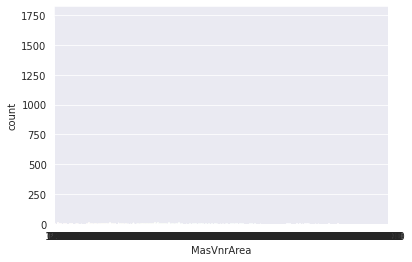

In [36]:
# NUMERIK
sns.countplot(all_data["MasVnrArea"])
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(all_data["MasVnrArea"].mode()[0])

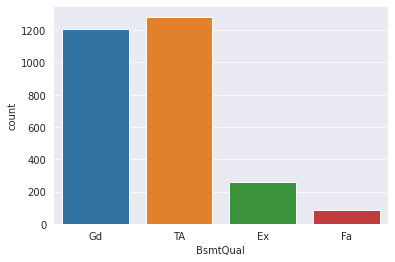

In [37]:
# KATAGORIKAL
sns.countplot(all_data["BsmtQual"])
all_data["BsmtQual"] = all_data["BsmtQual"].fillna(all_data["BsmtQual"].mode()[0])

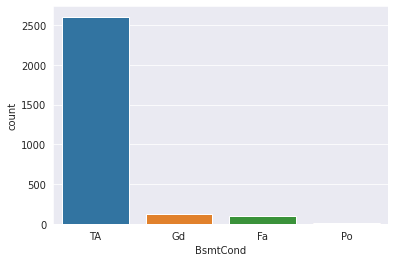

In [38]:
# KATAGORIKAL
sns.countplot(all_data["BsmtCond"])
all_data["BsmtCond"] = all_data["BsmtCond"].fillna(all_data["BsmtCond"].mode()[0])

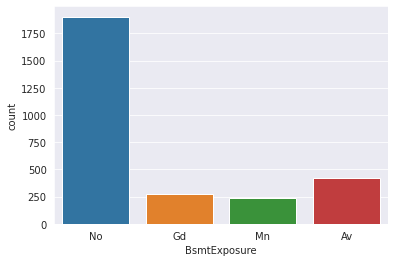

In [39]:
# KATAGORIKAL
sns.countplot(all_data["BsmtExposure"])
all_data["BsmtExposure"] = all_data["BsmtExposure"].fillna(all_data["BsmtExposure"].mode()[0])

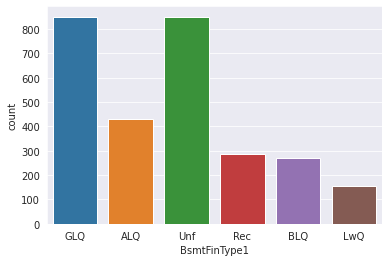

In [40]:
# KATAGORIKAL
sns.countplot(all_data["BsmtFinType1"])
all_data["BsmtFinType1"] = all_data["BsmtFinType1"].fillna(all_data["BsmtFinType1"].mode()[0])

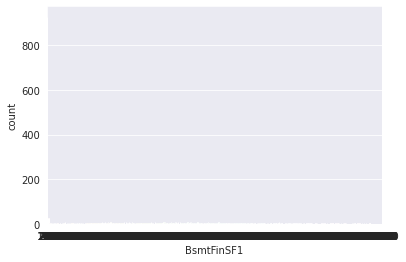

In [41]:
# NUMERIKAL
sns.countplot(all_data["BsmtFinSF1"])
all_data["BsmtFinSF1"] = all_data["BsmtFinSF1"].fillna(all_data["BsmtFinSF1"].mean())

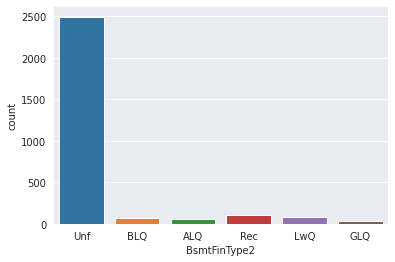

In [42]:
# KATAGORIKAL
sns.countplot(all_data["BsmtFinType2"])
all_data["BsmtFinType2"] = all_data["BsmtFinType2"].fillna(all_data["BsmtFinType2"].mode()[0])

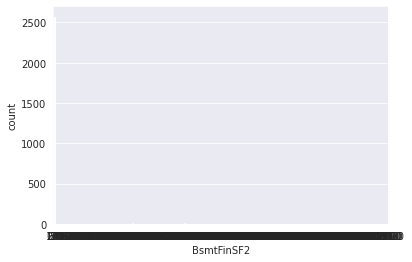

In [43]:
# NUMERIK
sns.countplot(all_data["BsmtFinSF2"])
all_data["BsmtFinSF2"] = all_data["BsmtFinSF2"].fillna(all_data["BsmtFinSF2"].mode()[0])

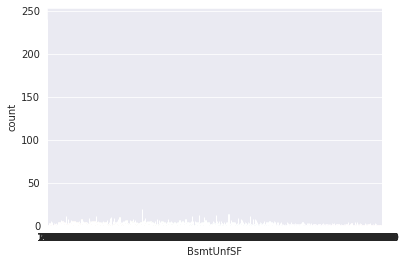

In [44]:
# NUMERIK
sns.countplot(all_data["BsmtUnfSF"])
all_data["BsmtUnfSF"] = all_data["BsmtUnfSF"].fillna(all_data["BsmtUnfSF"].mean())

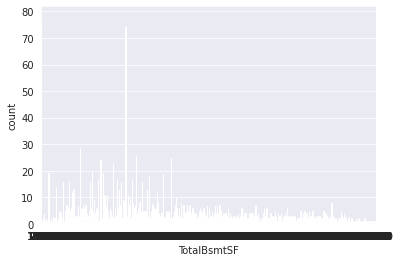

In [45]:
# NUMERIK
sns.countplot(all_data["TotalBsmtSF"])
all_data["TotalBsmtSF"] = all_data["TotalBsmtSF"].fillna(all_data["TotalBsmtSF"].mean())

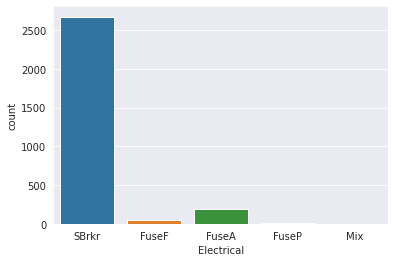

In [46]:
# KATEGORIKAL
sns.countplot(all_data["Electrical"])
all_data["Electrical"] = all_data["Electrical"].fillna(all_data["Electrical"].mode()[0])

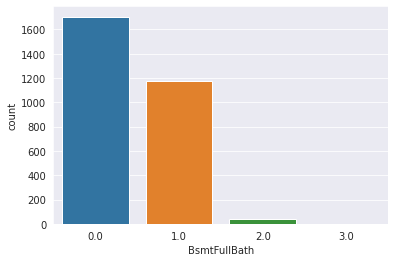

In [47]:
# NUMERIKAL
sns.countplot(all_data["BsmtFullBath"])
all_data["BsmtFullBath"] = all_data["BsmtFullBath"].fillna(all_data["BsmtFullBath"].mode()[0])

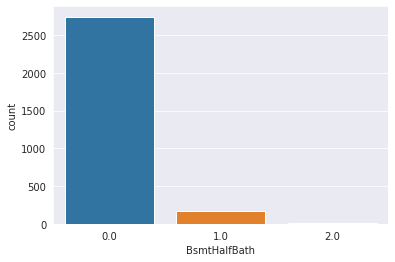

In [48]:
# NUMERIKAL
sns.countplot(all_data["BsmtHalfBath"])
all_data["BsmtHalfBath"] = all_data["BsmtHalfBath"].fillna(all_data["BsmtHalfBath"].mode()[0])

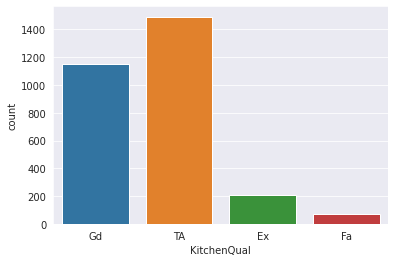

In [49]:
# KATEGORIKAL
sns.countplot(all_data["KitchenQual"])
all_data["KitchenQual"] = all_data["KitchenQual"].fillna(all_data["KitchenQual"].mode()[0])

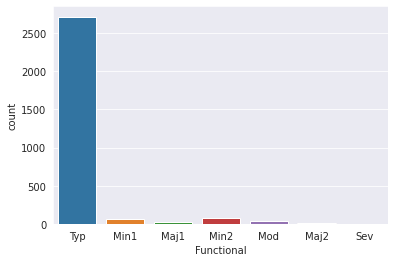

In [50]:
# KATEGORIKAL
sns.countplot(all_data["Functional"])
all_data["Functional"] = all_data["Functional"].fillna(all_data["Functional"].mode()[0])

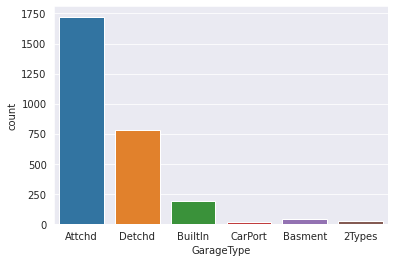

In [51]:
# KATEGORIKAL
sns.countplot(all_data["GarageType"])
all_data["GarageType"] = all_data["GarageType"].fillna(all_data["GarageType"].mode()[0])

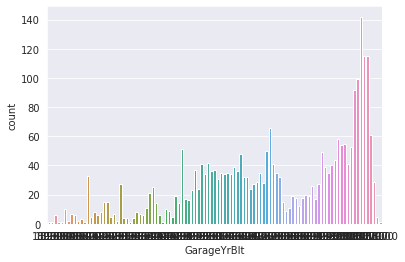

In [52]:
# NUMERIKAL
sns.countplot(all_data["GarageYrBlt"])
all_data["GarageYrBlt"] = all_data["GarageYrBlt"].fillna(all_data["GarageYrBlt"].median())

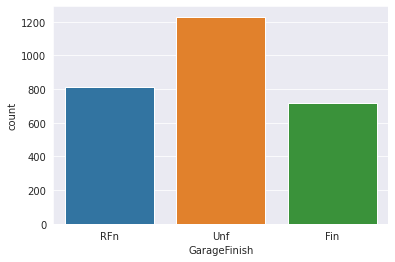

In [53]:
# KATEGORIKAL
sns.countplot(all_data["GarageFinish"])
all_data["GarageFinish"] = all_data["GarageFinish"].fillna(all_data["GarageFinish"].mode()[0])

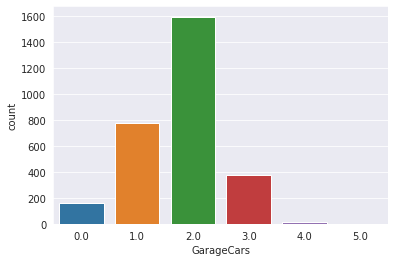

In [54]:
# NUMERIKAL
sns.countplot(all_data["GarageCars"])
all_data["GarageCars"] = all_data["GarageCars"].fillna(all_data["GarageCars"].mode()[0])

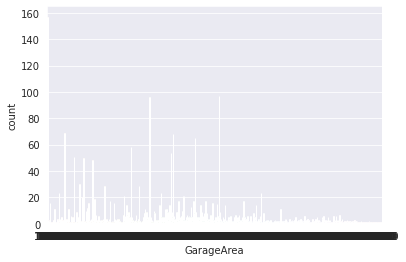

In [55]:
# NUMERIKAL
sns.countplot(all_data["GarageArea"])
all_data["GarageArea"] = all_data["GarageArea"].fillna(all_data["GarageArea"].median())

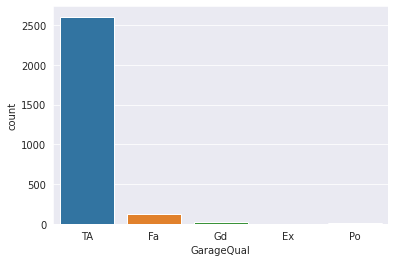

In [56]:
# KATAGORIKAL
sns.countplot(all_data["GarageQual"])
all_data["GarageQual"] = all_data["GarageQual"].fillna(all_data["GarageQual"].mode()[0])

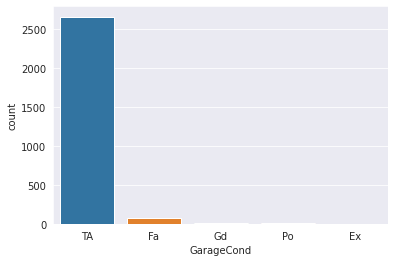

In [57]:
# KATAGORIKAL
sns.countplot(all_data["GarageCond"])
all_data["GarageCond"] = all_data["GarageCond"].fillna(all_data["GarageCond"].mode()[0])

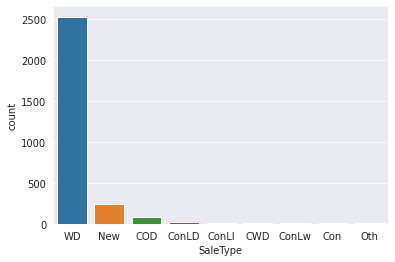

In [58]:
# KATAGORIKAL
sns.countplot(all_data["SaleType"])
all_data["SaleType"] = all_data["SaleType"].fillna(all_data["SaleType"].mode()[0])

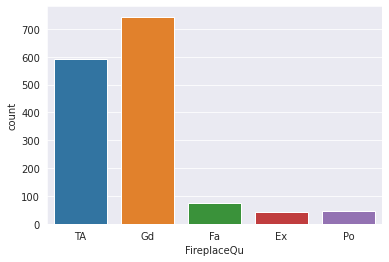

In [59]:
# KATAGORIKAL
sns.countplot(all_data["FireplaceQu"])
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna(all_data["FireplaceQu"].mode()[0])

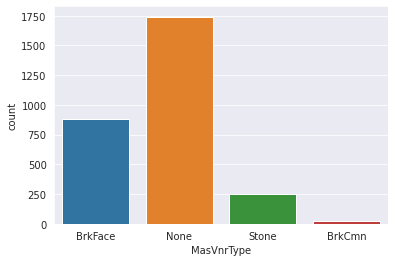

In [60]:
# KATAGORIKAL
sns.countplot(all_data["MasVnrType"])
all_data["MasVnrType"] = all_data["MasVnrType"].fillna(all_data["MasVnrType"].mode()[0])

In [61]:
#CEK KEMBALI MISSING VALUE
data_missing = all_data.isnull().sum()[all_data.isnull().sum()>0]
data_missing

Alley          2721
PoolQC         2909
Fence          2348
MiscFeature    2814
dtype: int64

#### Catatan : HAPUS (PoolQC, Fence, MiscFeature, Alley)

---



HAPUS FITURE ITU KARENA, MISSING VALUE SANGAT BANYAK, ATAU BIARKAN SAJA NAMUM JANGAN GUNAKAN DALAM PEMODELAN
*teks yang dimiringkan*

### konvert beberapa feature kedalam bentuk string
dikarenakan ada beberapa nilai dari feature numerik yg sebenarnya bertipe katagorik
1. MSSubClass
2. OverallCond
3. OverallQual
4. YrSold
5. MoSold

In [62]:
all_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,Gd,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [63]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2919 non-null   object 
 3   LotFrontage    2919 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2919 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [64]:
# convert data numerik menjadi katagorikal
all_data['MSSubClass'] = all_data['MSSubClass'].astype(str)
all_data['OverallCond'] = all_data['OverallCond'].astype(str)
all_data['OverallQual'] = all_data['OverallQual'].astype(str)
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [65]:
# Cek Kembali type data dari beberapa feature yg telah diubah
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   object 
 2   MSZoning       2919 non-null   object 
 3   LotFrontage    2919 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2919 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   object 
 18  OverallC

### Menambahkan fiture baru

tambahkan fiture baru yang diangga penting dan memberikan dampak bagi model yaitu TotalSf = TotalBsmttSF + 1stFlrSF + 2ndFlrSF

In [66]:
all_data["TotalSF"] = all_data["TotalBsmtSF"] + all_data["1stFlrSF"] + all_data["2ndFlrSF"]
all_data.shape

(2919, 81)

### Melebelkan data katagorik

lebelkan beberapa data categoric menjadi sebuah angka, agar dapat digunakan dalam pemodelan

In [67]:
# daftar data numerik
data_numerik = all_data.dtypes[all_data.dtypes != "object"].index
data_numerik

Index(['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'TotalSF'],
      dtype='object')

In [68]:
# daftar data kategorik 
data_categoric = all_data.dtypes[all_data.dtypes == "object"].index
data_categoric

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [69]:
from sklearn.preprocessing import LabelEncoder
col_catagoric = ('FireplaceQu', 'BsmtQual', 'BsmtQual', 'GarageQual', 'GarageCond', 'ExterQual', 'ExterCond', 
                'PoolQC',  'HeatingQC', 'KitchenQual',  'BsmtFinType1', 'BsmtFinType2',  'Functional', 'Fence',
                'BsmtExposure', 'GarageFinish', 'LandSlope', 'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 
                'MSSubClass', 'OverallCond', 'MoSold', 'YrSold')

# melebelkan feature categorik 
for c in col_catagoric:
    lebel = LabelEncoder()
    lebel.fit(list(all_data[c].values))
    all_data[c] = lebel.transform(list(all_data[c].values))

# lihat ukuran all_data setelah dilebelkan
all_data.shape

(2919, 81)

In [70]:
all_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSF
0,1,10,RL,65.0,8450,1,2,3,Lvl,AllPub,Inside,0,CollgCr,Norm,Norm,1Fam,2Story,7,4,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,2,4,PConc,2,TA,3,2,706.0,5,0.0,150.0,856.0,GasA,...,1,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,2,8,6,0,2,Attchd,2003.0,1,2.0,548.0,4,4,2,0,61,0,0,0,0,3,4,NaN,0,4,2,WD,Normal,2566.0
1,2,5,RL,80.0,9600,1,2,3,Lvl,AllPub,FR2,0,Veenker,Feedr,Norm,1Fam,1Story,6,7,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,4,CBlock,2,TA,1,0,978.0,5,0.0,284.0,1262.0,GasA,...,1,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,3,6,6,1,4,Attchd,1976.0,1,2.0,460.0,4,4,2,298,0,0,0,0,0,3,4,NaN,0,7,1,WD,Normal,2524.0
2,3,10,RL,68.0,11250,1,2,0,Lvl,AllPub,Inside,0,CollgCr,Norm,Norm,1Fam,2Story,7,4,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,2,4,PConc,2,TA,2,2,486.0,5,0.0,434.0,920.0,GasA,...,1,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,2,6,6,1,4,Attchd,2001.0,1,2.0,608.0,4,4,2,0,42,0,0,0,0,3,4,NaN,0,11,2,WD,Normal,2706.0
3,4,11,RL,60.0,9550,1,2,0,Lvl,AllPub,Corner,0,Crawfor,Norm,Norm,1Fam,2Story,7,4,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,3,4,BrkTil,3,Gd,3,0,216.0,5,0.0,540.0,756.0,GasA,...,1,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,2,7,6,1,2,Detchd,1998.0,2,3.0,642.0,4,4,2,0,35,272,0,0,0,3,4,NaN,0,4,0,WD,Abnorml,2473.0
4,5,10,RL,84.0,14260,1,2,0,Lvl,AllPub,FR2,0,NoRidge,Norm,Norm,1Fam,2Story,8,4,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,2,4,PConc,2,TA,0,2,655.0,5,0.0,490.0,1145.0,GasA,...,1,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,2,9,6,1,4,Attchd,2000.0,1,3.0,836.0,4,4,2,192,84,0,0,0,0,3,4,NaN,0,3,2,WD,Normal,3343.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,2,RM,21.0,1936,1,2,3,Lvl,AllPub,Inside,0,MeadowV,Norm,Norm,Twnhs,2Story,4,6,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,3,4,CBlock,3,TA,3,5,0.0,5,0.0,546.0,546.0,GasA,...,1,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,3,5,6,0,2,Attchd,1979.0,2,0.0,0.0,4,4,2,0,0,0,0,0,0,3,4,NaN,0,8,0,WD,Normal,1638.0
2915,2916,2,RM,21.0,1894,1,2,3,Lvl,AllPub,Inside,0,MeadowV,Norm,Norm,TwnhsE,2Story,4,4,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,3,4,CBlock,3,TA,3,4,252.0,5,0.0,294.0,546.0,GasA,...,1,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,3,6,6,0,2,CarPort,1970.0,2,1.0,286.0,4,4,2,0,24,0,0,0,0,3,4,NaN,0,6,0,WD,Abnorml,1638.0
2916,2917,5,RL,160.0,20000,1,2,3,Lvl,AllPub,Inside,0,Mitchel,Norm,Norm,1Fam,1Story,5,6,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,4,CBlock,3,TA,3,0,1224.0,5,0.0,0.0,1224.0,GasA,...,1,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,3,7,6,1,4,Detchd,1960.0,2,2.0,576.0,4,4,2,474,0,0,0,0,0,3,4,NaN,0,11,0,WD,Abnorml,2448.0
2917,2918,14,RL,62.0,10441,1,2,3,Lvl,AllPub,Inside,0,Mitchel,Norm,Norm,1Fam,SFoyer,5,4,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,3,4,PConc,2,TA,0,2,337.0,5,0.0,575.0,912.0,GasA,...,1,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,3,6,6,0,2,Attchd,1979.0,2,0.0,0.0,4,4,2,80,32,0,0,0,0,3,2,Shed,700,9,0,WD,Normal,1882.0


### fiture skewness

1.  nilai skewness = 0 , artinya data berdistribusi normal dan kurvanya simetris
2. nilai skewness > 0 , artinya bobot data lebih besar di kaki kiri distribusinya dan kurvanya miring kekanan
3. nilai skewness < 0 ,  artinya bobot data lebih besar di kaki kanan distribusinya dan kurvanya miring kekiri
sehingga perlu dilakukan trsnsformasi data

  
Skewness atau disebut juga ukuran kemiringan yaitu suatu bilangan yang dapat menunjukanmiring atau tidaknya bentuk kurva suatu distribusi frekuensi. Skewness adalah derajatketidaksimetrisan suatu distribusi. Jika kurva frekuensi suatu distribusi memiliki ekor yang lebihmemanjang ke kanan (dilihat dari meannya) maka dikatakan menceng kanan (positif) dan jikasebaliknya maka menceng kiri (negatif).

### Catatan :
##### CARA MUDAH DALAM MENENTUKAN JENIS TRANSFORMASI DATA YAITU:
1.  DENGAN MELIHAT KURCA DISTRIBUSI DATANYA
2.  DENGAN MELIHAT NILAI MEAN DAN STANDAR DEVIASINYA
3.  DENGAN MELIHAT NILAI SKEW DAN KURTOSINYA

In [71]:
from scipy.stats import norm, skew
# mendaftar feature numerik
numerik = all_data.dtypes[all_data.dtypes != "object"].index

# menampilkan nilai feature skewness
kaki_skew = all_data[numerik].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'skew':kaki_skew})
skewness

,skew
MiscVal,21.947195
PoolArea,16.898328
LotArea,12.822431
LowQualFinSF,12.088761
3SsnPorch,11.376065
LandSlope,4.975157
KitchenAbvGr,4.302254
BsmtFinSF2,4.146143
EnclosedPorch,4.003891
ScreenPorch,3.946694


#### Catatan 1 :
KARENA ADA BEBERAPA NILAI FEATURE NUMERIK YANG MEMILIKI SKEWNESS YANG TINGGI, ARTINYA DATA TERSEBUT TIDAK BERDISTRIBUSI NORMAL. SEHINGGA FITURE TERSEBUT HARUS DITRANSFORMASIKAN DENGAN METODE BOX COX.

#### catatan 2 :
DATA DIKATAKAN BERDISTRIBUSI NORMAL APABILA NILAO SKEWNESSNYA MENDEKATI 0, DATA TETAP DAPAT DIKATAKAN NORMAL APABILA NILAI SKEWNESSNYA BERADA DI ANTARA -0.5 SAMPAI 0.5

#### Catatan 3 :
saya akan mentransformasikan data yg memiliki nilai skewnes > 0.50 dan < -0.50
agar model yg dihasilkan lebih baik

In [72]:
# jumlah data yg nilai skewnessnya > 0.50
skewness_positif = skewness[skewness.values > 0.50] 
len(skewness_positif)


28

In [73]:
# panggil data yg memiliki skewness > 0.50
skewness_positif

,skew
MiscVal,21.947195
PoolArea,16.898328
LotArea,12.822431
LowQualFinSF,12.088761
3SsnPorch,11.376065
LandSlope,4.975157
KitchenAbvGr,4.302254
BsmtFinSF2,4.146143
EnclosedPorch,4.003891
ScreenPorch,3.946694


In [74]:
# jumlah data yg nilai skewnessnya < -0.50
skewness_negatif = skewness[skewness.values < -0.50] 
len(skewness_negatif)

18

In [75]:
# panggil skewness yg memiliki nilai < -0.50
skewness_negatif

,skew
YearBuilt,-0.599806
LotShape,-0.617690
MoSold,-0.645257
BsmtExposure,-1.216562
BsmtQual,-1.297560
KitchenQual,-1.448023
ExterQual,-1.801409
Fence,-1.993777
ExterCond,-2.497719
PavedDrive,-2.979084


#### Catatan :
terdapat 28 feature yang memiliki nilai skewness > 0.50 dan 17 feature yang memiliki nilai skewness < -0.50

## Koefisien Kurtosis
koefisien kurtosis adalah gambaran keruncingan kurva distribusi data, yakni derajat ketinggian puncak suatu distribusi frekuensi, biasanya diambil relatif terhadap distribusi normal. Nilai koefisien kurtosis yang baik adalah yang mendekati nol, semakin besar nilainya maka tingkat keruncingan kurvanya semakain tinggi.

Nilai kurtosis dari MiscVal : 563.1067782423772
Nilai skew dari MiscVal     : 21.9471948077491

 mu = 50.82597 and sigma = 567.30501



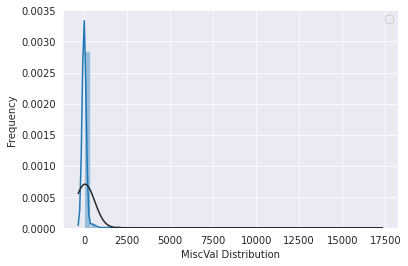

In [76]:
from scipy.stats import kurtosis

# nilai kurtosis dan skew untuk melihat kecondongan kurva distribusi
print( 'Nilai kurtosis dari MiscVal : {}'.format( kurtosis(all_data["MiscVal"]) ))
print( 'Nilai skew dari MiscVal     : {}'.format( skew(all_data["MiscVal"]) ))

# bandingkan bentuk distribusi dari SalePrice dengan kurva distribusi normal yang baik
(mu, sigma) = norm.fit(all_data["MiscVal"])
print("\n mu = {:.5f} and sigma = {:.5f}\n". format(mu, sigma))

plt.legend(["Normal Distribution. ($\mu_$ {:.5f}) and $\sigma_$ {:.5f}". format (mu, sigma)], loc ='best')
sns.distplot(all_data["MiscVal"], fit=norm)
plt.ylabel('Frequency')
plt.xlabel('MiscVal Distribution')
plt.show()

Dapat disimpulkan bahwa kurva MiscVal berbentuk Substansial Positif Skewness

Nilai kurtosis dari PoolArea : 298.11980075600536
Nilai skew dari PoolArea     : 16.89832791614449

 mu = 2.25180 and sigma = 35.65784



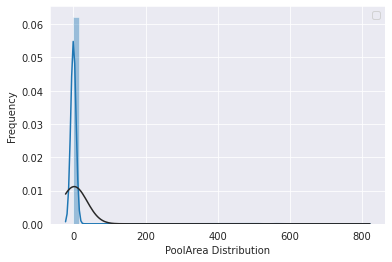

In [77]:
# nilai kurtosis dan skew untuk melihat kecondongan kurva distribusi
print( 'Nilai kurtosis dari PoolArea : {}'.format( kurtosis(all_data["PoolArea"]) ))
print( 'Nilai skew dari PoolArea     : {}'.format( skew(all_data["PoolArea"]) ))

# bandingkan bentuk distribusi dari SalePrice dengan kurva distribusi normal yang baik
(mu, sigma) = norm.fit(all_data["PoolArea"])
print("\n mu = {:.5f} and sigma = {:.5f}\n". format(mu, sigma))

plt.legend(["Normal Distribution. ($\mu_$ {:.5f}) and $\sigma_$ {:.5f}". format (mu, sigma)], loc ='best')
sns.distplot(all_data["PoolArea"], fit=norm)
plt.ylabel('Frequency')
plt.xlabel('PoolArea Distribution')
plt.show()

Dapat disimpulkan bahwa kurva PoalArea berbentuk Substansial Positif Skewness

Nilai kurtosis dari LotArea : 264.4966320739909
Nilai skew dari LotArea     : 12.822431401556724

 mu = 10168.11408 and sigma = 7885.64527



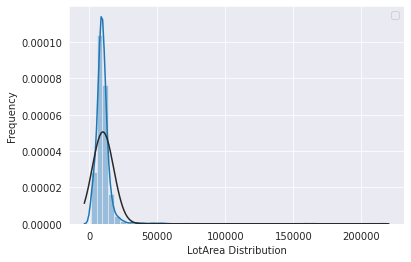

In [78]:
# nilai kurtosis dan skew untuk melihat kecondongan kurva distribusi
print( 'Nilai kurtosis dari LotArea : {}'.format( kurtosis(all_data["LotArea"]) ))
print( 'Nilai skew dari LotArea     : {}'.format( skew(all_data["LotArea"]) ))

# bandingkan bentuk distribusi dari SalePrice dengan kurva distribusi normal yang baik
(mu, sigma) = norm.fit(all_data["LotArea"])
print("\n mu = {:.5f} and sigma = {:.5f}\n". format(mu, sigma))

plt.legend(["Normal Distribution. ($\mu_$ {:.5f}) and $\sigma_$ {:.5f}". format (mu, sigma)], loc ='best')
sns.distplot(all_data["LotArea"], fit=norm)
plt.ylabel('Frequency')
plt.xlabel('LotArea Distribution')
plt.show()

Dapat disimpulkan bahwa kurva LootArea berbentuk Substansial Positif Skewness

Nilai kurtosis dari LowQualFinSF : 174.6312561915874
Nilai skew dari LowQualFinSF     : 12.088761003370664

 mu = 4.69442 and sigma = 46.38888



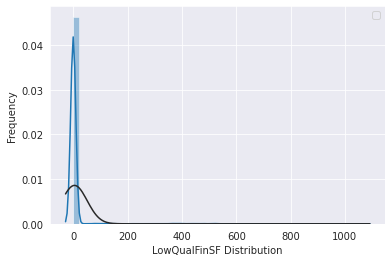

In [79]:
# nilai kurtosis dan skew untuk melihat kecondongan kurva distribusi
print( 'Nilai kurtosis dari LowQualFinSF : {}'.format( kurtosis(all_data["LowQualFinSF"]) ))
print( 'Nilai skew dari LowQualFinSF     : {}'.format( skew(all_data["LowQualFinSF"]) ))

# bandingkan bentuk distribusi dari SalePrice dengan kurva distribusi normal yang baik
(mu, sigma) = norm.fit(all_data["LowQualFinSF"])
print("\n mu = {:.5f} and sigma = {:.5f}\n". format(mu, sigma))

plt.legend(["Normal Distribution. ($\mu_$ {:.5f}) and $\sigma_$ {:.5f}". format (mu, sigma)], loc ='best')
sns.distplot(all_data["LowQualFinSF"], fit=norm)
plt.ylabel('Frequency')
plt.xlabel('LowQualFinSF Distribution')
plt.show()

Dapat disimpulkan bahwa kurva LowQualFinSF berbentuk Substansial Positif Skewness

Nilai kurtosis dari 3SsnPorch : 149.1519757850386
Nilai skew dari 3SsnPorch     : 11.376064682827481

 mu = 2.60226 and sigma = 25.18385



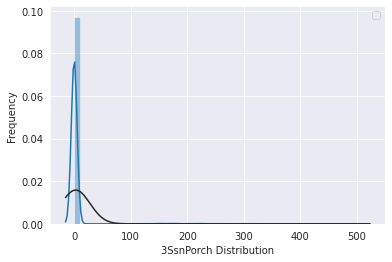

In [80]:
# nilai kurtosis dan skew untuk melihat kecondongan kurva distribusi
print( 'Nilai kurtosis dari 3SsnPorch : {}'.format( kurtosis(all_data["3SsnPorch"]) ))
print( 'Nilai skew dari 3SsnPorch     : {}'.format( skew(all_data["3SsnPorch"]) ))

# bandingkan bentuk distribusi dari SalePrice dengan kurva distribusi normal yang baik
(mu, sigma) = norm.fit(all_data["3SsnPorch"])
print("\n mu = {:.5f} and sigma = {:.5f}\n". format(mu, sigma))

plt.legend(["Normal Distribution. ($\mu_$ {:.5f}) and $\sigma_$ {:.5f}". format (mu, sigma)], loc ='best')
sns.distplot(all_data["3SsnPorch"], fit=norm)
plt.ylabel('Frequency')
plt.xlabel('3SsnPorch Distribution')
plt.show()

Dapat disimpulkan bahwa kurva 3SsnPorch berbentuk Substansial Positif Skewness

Nilai kurtosis dari Alley : 13.882712783754226
Nilai skew dari Alley     : -3.895129975946486

 mu = 1.89106 and sigma = 0.42343



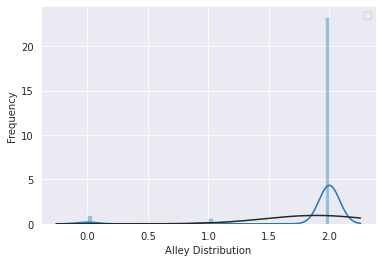

In [81]:
# nilai kurtosis dan skew untuk melihat kecondongan kurva distribusi
print( 'Nilai kurtosis dari Alley : {}'.format( kurtosis(all_data["Alley"]) ))
print( 'Nilai skew dari Alley     : {}'.format( skew(all_data["Alley"]) ))

# bandingkan bentuk distribusi dari SalePrice dengan kurva distribusi normal yang baik
(mu, sigma) = norm.fit(all_data["Alley"])
print("\n mu = {:.5f} and sigma = {:.5f}\n". format(mu, sigma))

plt.legend(["Normal Distribution. ($\mu_$ {:.5f}) and $\sigma_$ {:.5f}". format (mu, sigma)], loc ='best')
sns.distplot(all_data["Alley"], fit=norm)
plt.ylabel('Frequency')
plt.xlabel('Alley Distribution')
plt.show()

Dapat disimpulkan bahwa kurva Alley berbentuk Substansial Positif Skewness

Nilai kurtosis dari LandSlope : 26.527810405135686
Nilai skew dari LandSlope     : 4.975156836432334

 mu = 0.05379 and sigma = 0.24871



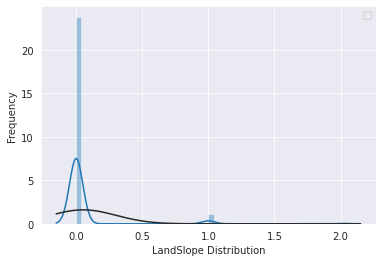

In [82]:
# nilai kurtosis dan skew untuk melihat kecondongan kurva distribusi
print( 'Nilai kurtosis dari LandSlope : {}'.format( kurtosis(all_data["LandSlope"]) ))
print( 'Nilai skew dari LandSlope     : {}'.format( skew(all_data["LandSlope"]) ))

# bandingkan bentuk distribusi dari SalePrice dengan kurva distribusi normal yang baik
(mu, sigma) = norm.fit(all_data["LandSlope"])
print("\n mu = {:.5f} and sigma = {:.5f}\n". format(mu, sigma))

plt.legend(["Normal Distribution. ($\mu_$ {:.5f}) and $\sigma_$ {:.5f}". format (mu, sigma)], loc ='best')
sns.distplot(all_data["LandSlope"], fit=norm)
plt.ylabel('Frequency')
plt.xlabel('LandSlope Distribution')
plt.show()

Dapat disimpulkan bahwa kurva LandSlope berbentuk Substansial Positif Skewness

Nilai kurtosis dari KitchenAbvGr : 19.74202010880436
Nilai skew dari KitchenAbvGr     : 4.302254369609591

 mu = 1.04454 and sigma = 0.21443



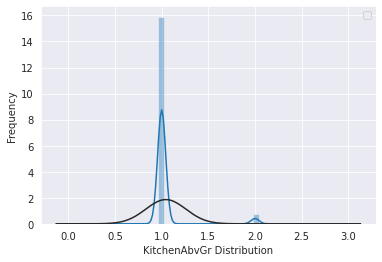

In [83]:
# nilai kurtosis dan skew untuk melihat kecondongan kurva distribusi
print( 'Nilai kurtosis dari KitchenAbvGr : {}'.format( kurtosis(all_data["KitchenAbvGr"]) ))
print( 'Nilai skew dari KitchenAbvGr     : {}'.format( skew(all_data["KitchenAbvGr"]) ))

# bandingkan bentuk distribusi dari SalePrice dengan kurva distribusi normal yang baik
(mu, sigma) = norm.fit(all_data["KitchenAbvGr"])
print("\n mu = {:.5f} and sigma = {:.5f}\n". format(mu, sigma))

plt.legend(["Normal Distribution. ($\mu_$ {:.5f}) and $\sigma_$ {:.5f}". format (mu, sigma)], loc ='best')
sns.distplot(all_data["KitchenAbvGr"], fit=norm)
plt.ylabel('Frequency')
plt.xlabel('KitchenAbvGr Distribution')
plt.show()

Dapat disimpulkan bahwa kurva KitchenAbvGr berbentuk Substansial Positif Skewness

Nilai kurtosis dari BsmtFinSF2 : 18.810079273824332
Nilai skew dari BsmtFinSF2     : 4.146143269564016

 mu = 49.56526 and sigma = 169.15012



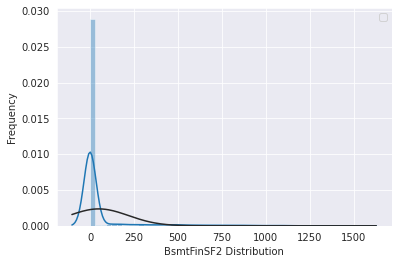

In [84]:
# nilai kurtosis dan skew untuk melihat kecondongan kurva distribusi
print( 'Nilai kurtosis dari BsmtFinSF2 : {}'.format( kurtosis(all_data["BsmtFinSF2"]) ))
print( 'Nilai skew dari BsmtFinSF2     : {}'.format( skew(all_data["BsmtFinSF2"]) ))

# bandingkan bentuk distribusi dari SalePrice dengan kurva distribusi normal yang baik
(mu, sigma) = norm.fit(all_data["BsmtFinSF2"])
print("\n mu = {:.5f} and sigma = {:.5f}\n". format(mu, sigma))

plt.legend(["Normal Distribution. ($\mu_$ {:.5f}) and $\sigma_$ {:.5f}". format (mu, sigma)], loc ='best')
sns.distplot(all_data["BsmtFinSF2"], fit=norm)
plt.ylabel('Frequency')
plt.xlabel('BsmtFinSF2 Distribution')
plt.show()

Dapat disimpulkan bahwa kurva BsmtFinSF2 berbentuk Substansial Positif Skewness

Nilai kurtosis dari EnclosedPorch : 28.327268478734087
Nilai skew dari EnclosedPorch     : 4.003891220540856

 mu = 23.09832 and sigma = 64.23324



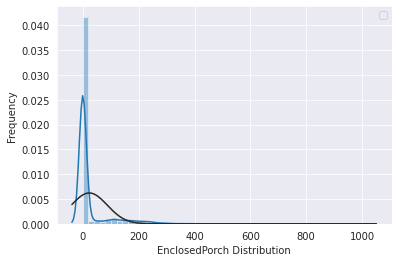

In [85]:
# nilai kurtosis dan skew untuk melihat kecondongan kurva distribusi
print( 'Nilai kurtosis dari EnclosedPorch : {}'.format( kurtosis(all_data["EnclosedPorch"]) ))
print( 'Nilai skew dari EnclosedPorch     : {}'.format( skew(all_data["EnclosedPorch"]) ))

# bandingkan bentuk distribusi dari SalePrice dengan kurva distribusi normal yang baik
(mu, sigma) = norm.fit(all_data["EnclosedPorch"])
print("\n mu = {:.5f} and sigma = {:.5f}\n". format(mu, sigma))

plt.legend(["Normal Distribution. ($\mu_$ {:.5f}) and $\sigma_$ {:.5f}". format (mu, sigma)], loc ='best')
sns.distplot(all_data["EnclosedPorch"], fit=norm)
plt.ylabel('Frequency')
plt.xlabel('EnclosedPorch Distribution')
plt.show()

Dapat disimpulkan bahwa kurva EnclosedPorch berbentuk Substansial Positif Skewness

Nilai kurtosis dari ScreenPorch : 17.74421342304928
Nilai skew dari ScreenPorch     : 3.9466937029936977

 mu = 16.06235 and sigma = 56.17474



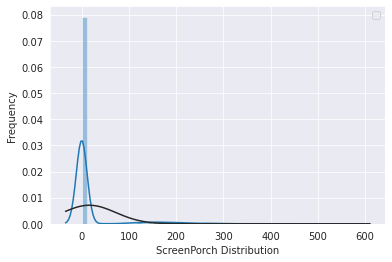

In [86]:
# nilai kurtosis dan skew untuk melihat kecondongan kurva distribusi
print( 'Nilai kurtosis dari ScreenPorch : {}'.format( kurtosis(all_data["ScreenPorch"]) ))
print( 'Nilai skew dari ScreenPorch     : {}'.format( skew(all_data["ScreenPorch"]) ))

# bandingkan bentuk distribusi dari SalePrice dengan kurva distribusi normal yang baik
(mu, sigma) = norm.fit(all_data["ScreenPorch"])
print("\n mu = {:.5f} and sigma = {:.5f}\n". format(mu, sigma))

plt.legend(["Normal Distribution. ($\mu_$ {:.5f}) and $\sigma_$ {:.5f}". format (mu, sigma)], loc ='best')
sns.distplot(all_data["ScreenPorch"], fit=norm)
plt.ylabel('Frequency')
plt.xlabel('ScreenPorch Distribution')
plt.show()

Dapat disimpulkan bahwa kurva ScreenPorch berbentuk Substansial Positif Skewness

Nilai kurtosis dari BsmtHalfBath : 14.833973033552411
Nilai skew dari BsmtHalfBath     : 3.9315938391525584

 mu = 0.06132 and sigma = 0.24557



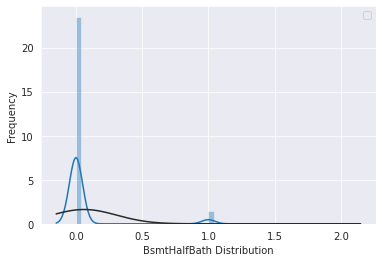

In [87]:
# nilai kurtosis dan skew untuk melihat kecondongan kurva distribusi
print( 'Nilai kurtosis dari BsmtHalfBath : {}'.format( kurtosis(all_data["BsmtHalfBath"]) ))
print( 'Nilai skew dari BsmtHalfBath     : {}'.format( skew(all_data["BsmtHalfBath"]) ))

# bandingkan bentuk distribusi dari SalePrice dengan kurva distribusi normal yang baik
(mu, sigma) = norm.fit(all_data["BsmtHalfBath"])
print("\n mu = {:.5f} and sigma = {:.5f}\n". format(mu, sigma))

plt.legend(["Normal Distribution. ($\mu_$ {:.5f}) and $\sigma_$ {:.5f}". format (mu, sigma)], loc ='best')
sns.distplot(all_data["BsmtHalfBath"], fit=norm)
plt.ylabel('Frequency')
plt.xlabel('BsmtHalfBath Distribution')
plt.show()

Dapat disimpulkan bahwa kurva BsmtHalfBath  berbentuk Substansial Positif Skewness

Nilai kurtosis dari MasVnrArea : 9.31837581316575
Nilai skew dari MasVnrArea     : 2.6135921295017983

 mu = 101.39603 and sigma = 178.82394



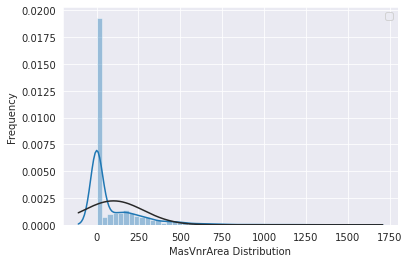

In [88]:
# nilai kurtosis dan skew untuk melihat kecondongan kurva distribusi
print( 'Nilai kurtosis dari MasVnrArea : {}'.format( kurtosis(all_data["MasVnrArea"]) ))
print( 'Nilai skew dari MasVnrArea     : {}'.format( skew(all_data["MasVnrArea"]) ))

# bandingkan bentuk distribusi dari SalePrice dengan kurva distribusi normal yang baik
(mu, sigma) = norm.fit(all_data["MasVnrArea"])
print("\n mu = {:.5f} and sigma = {:.5f}\n". format(mu, sigma))

plt.legend(["Normal Distribution. ($\mu_$ {:.5f}) and $\sigma_$ {:.5f}". format (mu, sigma)], loc ='best')
sns.distplot(all_data["MasVnrArea"], fit=norm)
plt.ylabel('Frequency')
plt.xlabel('MasVnrArea Distribution')
plt.show()

Dapat disimpulkan bahwa kurva MasVnrArea berbentuk Substansial Positif Skewness

Nilai kurtosis dari OpenPorchSF : 10.916571954391017
Nilai skew dari OpenPorchSF     : 2.5351137294802557

 mu = 47.48681 and sigma = 67.56392



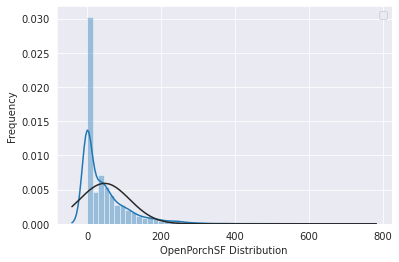

In [89]:
# nilai kurtosis dan skew untuk melihat kecondongan kurva distribusi
print( 'Nilai kurtosis dari OpenPorchSF : {}'.format( kurtosis(all_data["OpenPorchSF"]) ))
print( 'Nilai skew dari OpenPorchSF     : {}'.format( skew(all_data["OpenPorchSF"]) ))

# bandingkan bentuk distribusi dari SalePrice dengan kurva distribusi normal yang baik
(mu, sigma) = norm.fit(all_data["OpenPorchSF"])
print("\n mu = {:.5f} and sigma = {:.5f}\n". format(mu, sigma))

plt.legend(["Normal Distribution. ($\mu_$ {:.5f}) and $\sigma_$ {:.5f}". format (mu, sigma)], loc ='best')
sns.distplot(all_data["OpenPorchSF"], fit=norm)
plt.ylabel('Frequency')
plt.xlabel('OpenPorchSF Distribution')
plt.show()

Dapat disimpulkan bahwa kurva OpenPorchSF berbentuk Substansial Positif Skewness

Nilai kurtosis dari WoodDeckSF : 6.7279532273976965
Nilai skew dari WoodDeckSF     : 1.8424328111184782

 mu = 93.70983 and sigma = 126.50491



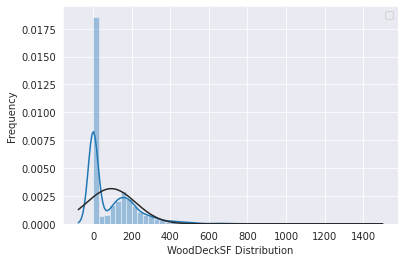

In [90]:
# nilai kurtosis dan skew untuk melihat kecondongan kurva distribusi
print( 'Nilai kurtosis dari WoodDeckSF : {}'.format( kurtosis(all_data["WoodDeckSF"]) ))
print( 'Nilai skew dari WoodDeckSF     : {}'.format( skew(all_data["WoodDeckSF"]) ))

# bandingkan bentuk distribusi dari SalePrice dengan kurva distribusi normal yang baik
(mu, sigma) = norm.fit(all_data["WoodDeckSF"])
print("\n mu = {:.5f} and sigma = {:.5f}\n". format(mu, sigma))

plt.legend(["Normal Distribution. ($\mu_$ {:.5f}) and $\sigma_$ {:.5f}". format (mu, sigma)], loc ='best')
sns.distplot(all_data["WoodDeckSF"], fit=norm)
plt.ylabel('Frequency')
plt.xlabel('WoodDeckSF Distribution')
plt.show()

Dapat disimpulkan bahwa kurva WoodDeckSF berbentuk Substansial Positif Skewness

Nilai kurtosis dari LotFrontage : 14.120786759828889
Nilai skew dari LotFrontage     : 1.6455737855221888

 mu = 69.30580 and sigma = 21.30869



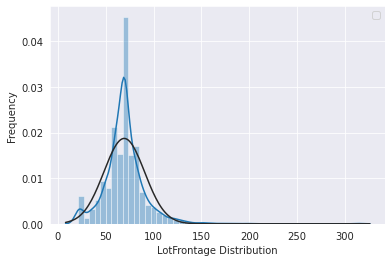

In [91]:
# nilai kurtosis dan skew untuk melihat kecondongan kurva distribusi
print( 'Nilai kurtosis dari LotFrontage : {}'.format( kurtosis(all_data["LotFrontage"]) ))
print( 'Nilai skew dari LotFrontage     : {}'.format( skew(all_data["LotFrontage"]) ))

# bandingkan bentuk distribusi dari SalePrice dengan kurva distribusi normal yang baik
(mu, sigma) = norm.fit(all_data["LotFrontage"])
print("\n mu = {:.5f} and sigma = {:.5f}\n". format(mu, sigma))

plt.legend(["Normal Distribution. ($\mu_$ {:.5f}) and $\sigma_$ {:.5f}". format (mu, sigma)], loc ='best')
sns.distplot(all_data["LotFrontage"], fit=norm)
plt.ylabel('Frequency')
plt.xlabel('LotFrontage Distribution')
plt.show()

Dapat disimpulkan bahwa kurva LotFrontage berbentuk Substansial Positif Skewness




Nilai kurtosis dari TotalSF : 9.79857461928772
Nilai skew dari TotalSF     : 1.5157998800939156

 mu = 2547.84302 and sigma = 804.47885



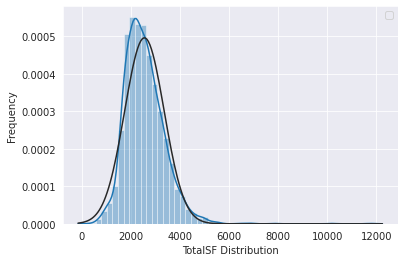

In [92]:
# nilai kurtosis dan skew untuk melihat kecondongan kurva distribusi
print( 'Nilai kurtosis dari TotalSF : {}'.format( kurtosis(all_data["TotalSF"]) ))
print( 'Nilai skew dari TotalSF     : {}'.format( skew(all_data["TotalSF"]) ))

# bandingkan bentuk distribusi dari SalePrice dengan kurva distribusi normal yang baik
(mu, sigma) = norm.fit(all_data["TotalSF"])
print("\n mu = {:.5f} and sigma = {:.5f}\n". format(mu, sigma))

plt.legend(["Normal Distribution. ($\mu_$ {:.5f}) and $\sigma_$ {:.5f}". format (mu, sigma)], loc ='best')
sns.distplot(all_data["TotalSF"], fit=norm)
plt.ylabel('Frequency')
plt.xlabel('TotalSF Distribution')
plt.show()

Dapat disimpulkan bahwa kurva TotalSF berbentuk Substansial Positif Skewness

Nilai kurtosis dari 1stFlrSF : 6.942514097204564
Nilai skew dari 1stFlrSF     : 1.4696044169256821

 mu = 1159.58171 and sigma = 392.29486



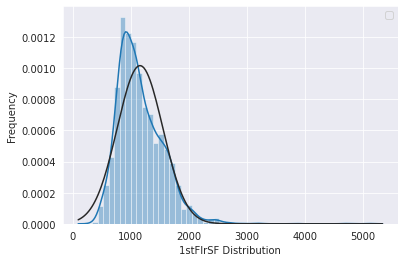

In [93]:
# nilai kurtosis dan skew untuk melihat kecondongan kurva distribusi
print( 'Nilai kurtosis dari 1stFlrSF : {}'.format( kurtosis(all_data["1stFlrSF"]) ))
print( 'Nilai skew dari 1stFlrSF     : {}'.format( skew(all_data["1stFlrSF"]) ))

# bandingkan bentuk distribusi dari SalePrice dengan kurva distribusi normal yang baik
(mu, sigma) = norm.fit(all_data["1stFlrSF"])
print("\n mu = {:.5f} and sigma = {:.5f}\n". format(mu, sigma))

plt.legend(["Normal Distribution. ($\mu_$ {:.5f}) and $\sigma_$ {:.5f}". format (mu, sigma)], loc ='best')
sns.distplot(all_data["1stFlrSF"], fit=norm)
plt.ylabel('Frequency')
plt.xlabel('1stFlrSF Distribution')
plt.show()

Dapat disimpulkan bahwa kurva 1stFlrSF berbentuk Substansial Positif Skewness

Nilai kurtosis dari BsmtFinSF1 : 6.8943404611257595
Nilai skew dari BsmtFinSF1     : 1.4252334408817189

 mu = 441.42324 and sigma = 455.45471



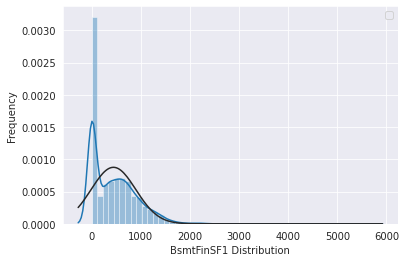

In [94]:
# nilai kurtosis dan skew untuk melihat kecondongan kurva distribusi
print( 'Nilai kurtosis dari BsmtFinSF1 : {}'.format( kurtosis(all_data["BsmtFinSF1"]) ))
print( 'Nilai skew dari BsmtFinSF1     : {}'.format( skew(all_data["BsmtFinSF1"]) ))

# bandingkan bentuk distribusi dari SalePrice dengan kurva distribusi normal yang baik
(mu, sigma) = norm.fit(all_data["BsmtFinSF1"])
print("\n mu = {:.5f} and sigma = {:.5f}\n". format(mu, sigma))

plt.legend(["Normal Distribution. ($\mu_$ {:.5f}) and $\sigma_$ {:.5f}". format (mu, sigma)], loc ='best')
sns.distplot(all_data["BsmtFinSF1"], fit=norm)
plt.ylabel('Frequency')
plt.xlabel('BsmtFinSF1 Distribution')
plt.show()

Dapat disimpulkan bahwa kurva BsmtFinSF1  berbentuk Substansial Positif Skewness

Nilai kurtosis dari GrLivArea : 4.112492367575526
Nilai skew dari GrLivArea     : 1.269357688230336

 mu = 1500.75985 and sigma = 505.96436



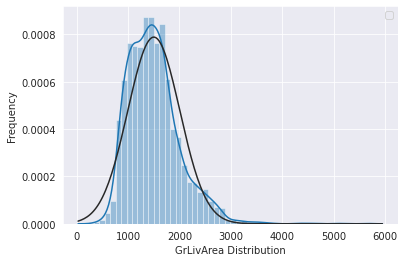

In [95]:
# nilai kurtosis dan skew untuk melihat kecondongan kurva distribusi
print( 'Nilai kurtosis dari GrLivArea : {}'.format( kurtosis(all_data["GrLivArea"]) ))
print( 'Nilai skew dari GrLivArea     : {}'.format( skew(all_data["GrLivArea"]) ))

# bandingkan bentuk distribusi dari SalePrice dengan kurva distribusi normal yang baik
(mu, sigma) = norm.fit(all_data["GrLivArea"])
print("\n mu = {:.5f} and sigma = {:.5f}\n". format(mu, sigma))

plt.legend(["Normal Distribution. ($\mu_$ {:.5f}) and $\sigma_$ {:.5f}". format (mu, sigma)], loc ='best')
sns.distplot(all_data["GrLivArea"], fit=norm)
plt.ylabel('Frequency')
plt.xlabel('GrLivArea Distribution')
plt.show()

Dapat disimpulkan bahwa kurva GrLivArea berbentuk moderate Positif Skewness

Nilai kurtosis dari TotalBsmtSF : 9.137528895805653
Nilai skew dari TotalBsmtSF     : 1.1624837493331972

 mu = 1051.77759 and sigma = 440.61523



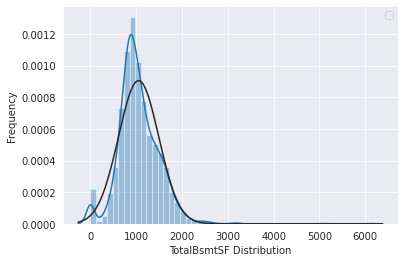

In [96]:
# nilai kurtosis dan skew untuk melihat kecondongan kurva distribusi
print( 'Nilai kurtosis dari TotalBsmtSF : {}'.format( kurtosis(all_data["TotalBsmtSF"]) ))
print( 'Nilai skew dari TotalBsmtSF     : {}'.format( skew(all_data["TotalBsmtSF"]) ))

# bandingkan bentuk distribusi dari SalePrice dengan kurva distribusi normal yang baik
(mu, sigma) = norm.fit(all_data["TotalBsmtSF"])
print("\n mu = {:.5f} and sigma = {:.5f}\n". format(mu, sigma))

plt.legend(["Normal Distribution. ($\mu_$ {:.5f}) and $\sigma_$ {:.5f}". format (mu, sigma)], loc ='best')
sns.distplot(all_data["TotalBsmtSF"], fit=norm)
plt.ylabel('Frequency')
plt.xlabel('TotalBsmtSF Distribution')
plt.show()

Dapat disimpulkan bahwa kurva TotalBsmtSF berbentuk Substansial Positif Skewness

Nilai kurtosis dari BsmtUnfSF : 0.4020356208195319
Nilai skew dari BsmtUnfSF     : 0.9195083116601191

 mu = 560.77210 and sigma = 439.39305



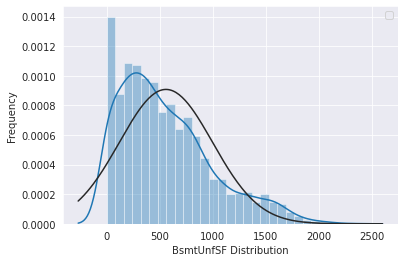

In [97]:

# nilai kurtosis dan skew untuk melihat kecondongan kurva distribusi
print( 'Nilai kurtosis dari BsmtUnfSF : {}'.format( kurtosis(all_data["BsmtUnfSF"]) ))
print( 'Nilai skew dari BsmtUnfSF     : {}'.format( skew(all_data["BsmtUnfSF"]) ))

# bandingkan bentuk distribusi dari SalePrice dengan kurva distribusi normal yang baik
(mu, sigma) = norm.fit(all_data["BsmtUnfSF"])
print("\n mu = {:.5f} and sigma = {:.5f}\n". format(mu, sigma))

plt.legend(["Normal Distribution. ($\mu_$ {:.5f}) and $\sigma_$ {:.5f}". format (mu, sigma)], loc ='best')
sns.distplot(all_data["BsmtUnfSF"], fit=norm)
plt.ylabel('Frequency')
plt.xlabel('BsmtUnfSF Distribution')
plt.show()

Dapat disimpulkan bahwa kurva BsmtUnfSF berbentuk Moderate Positif Skewness

Nilai kurtosis dari FireplaceQu : 0.33042918021515266
Nilai skew dari FireplaceQu     : 0.863675321690018

 mu = 2.36656 and sigma = 0.88142



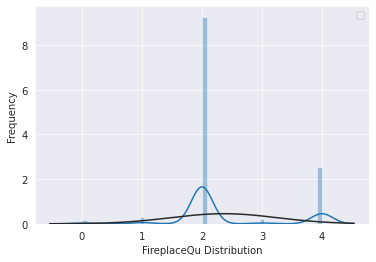

In [98]:
# nilai kurtosis dan skew untuk melihat kecondongan kurva distribusi
print( 'Nilai kurtosis dari FireplaceQu : {}'.format( kurtosis(all_data["FireplaceQu"]) ))
print( 'Nilai skew dari FireplaceQu     : {}'.format( skew(all_data["FireplaceQu"]) ))

# bandingkan bentuk distribusi dari SalePrice dengan kurva distribusi normal yang baik
(mu, sigma) = norm.fit(all_data["FireplaceQu"])
print("\n mu = {:.5f} and sigma = {:.5f}\n". format(mu, sigma))

plt.legend(["Normal Distribution. ($\mu_$ {:.5f}) and $\sigma_$ {:.5f}". format (mu, sigma)], loc ='best')
sns.distplot(all_data["FireplaceQu"], fit=norm)
plt.ylabel('Frequency')
plt.xlabel('FireplaceQu Distribution')
plt.show()

Dapat disimpulkan bahwa kurva FireplaceQu berbentuk Substansian Positif Skewness

Nilai kurtosis dari 2ndFlrSF : -0.4235925144377295
Nilai skew dari 2ndFlrSF     : 0.8616747488436027

 mu = 336.48373 and sigma = 428.62802



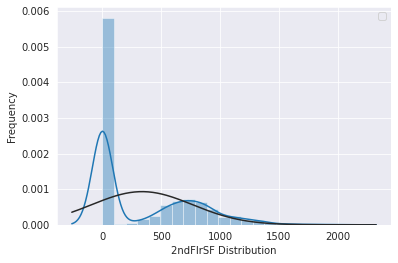

In [99]:
# nilai kurtosis dan skew untuk melihat kecondongan kurva distribusi
print( 'Nilai kurtosis dari 2ndFlrSF : {}'.format( kurtosis(all_data["2ndFlrSF"]) ))
print( 'Nilai skew dari 2ndFlrSF     : {}'.format( skew(all_data["2ndFlrSF"]) ))

# bandingkan bentuk distribusi dari SalePrice dengan kurva distribusi normal yang baik
(mu, sigma) = norm.fit(all_data["2ndFlrSF"])
print("\n mu = {:.5f} and sigma = {:.5f}\n". format(mu, sigma))

plt.legend(["Normal Distribution. ($\mu_$ {:.5f}) and $\sigma_$ {:.5f}". format (mu, sigma)], loc ='best')
sns.distplot(all_data["2ndFlrSF"], fit=norm)
plt.ylabel('Frequency')
plt.xlabel('2ndFlrSF Distribution')
plt.show()

Dapat disimpulkan bahwa kurva 2ndFlrSF  berbentuk Substansian Positif Skewness

Nilai kurtosis dari TotRmsAbvGrd : 1.1650072438898178
Nilai skew dari TotRmsAbvGrd     : 0.7583669060998621

 mu = 6.45152 and sigma = 1.56911



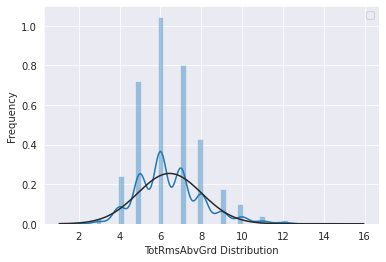

In [100]:
# nilai kurtosis dan skew untuk melihat kecondongan kurva distribusi
print( 'Nilai kurtosis dari TotRmsAbvGrd : {}'.format( kurtosis(all_data["TotRmsAbvGrd"]) ))
print( 'Nilai skew dari TotRmsAbvGrd     : {}'.format( skew(all_data["TotRmsAbvGrd"]) ))

# bandingkan bentuk distribusi dari SalePrice dengan kurva distribusi normal yang baik
(mu, sigma) = norm.fit(all_data["TotRmsAbvGrd"])
print("\n mu = {:.5f} and sigma = {:.5f}\n". format(mu, sigma))

plt.legend(["Normal Distribution. ($\mu_$ {:.5f}) and $\sigma_$ {:.5f}". format (mu, sigma)], loc ='best')
sns.distplot(all_data["TotRmsAbvGrd"], fit=norm)
plt.ylabel('Frequency')
plt.xlabel('TotRmsAbvGrd Distribution')
plt.show()

Dapat disimpulkan bahwa kurva TotRmsAbvGrd  berbentuk Moderate Positif Skewness

Nilai kurtosis dari Fireplaces : 0.07423820143399684
Nilai skew dari Fireplaces     : 0.7334945989608231

 mu = 0.59712 and sigma = 0.64602



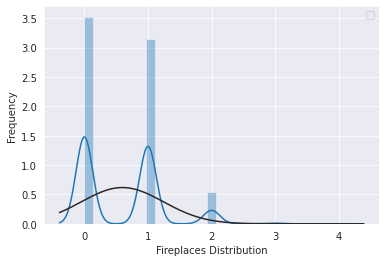

In [101]:
# nilai kurtosis dan skew untuk melihat kecondongan kurva distribusi
print( 'Nilai kurtosis dari Fireplaces : {}'.format( kurtosis(all_data["Fireplaces"]) ))
print( 'Nilai skew dari Fireplaces     : {}'.format( skew(all_data["Fireplaces"]) ))

# bandingkan bentuk distribusi dari SalePrice dengan kurva distribusi normal yang baik
(mu, sigma) = norm.fit(all_data["Fireplaces"])
print("\n mu = {:.5f} and sigma = {:.5f}\n". format(mu, sigma))

plt.legend(["Normal Distribution. ($\mu_$ {:.5f}) and $\sigma_$ {:.5f}". format (mu, sigma)], loc ='best')
sns.distplot(all_data["Fireplaces"], fit=norm)
plt.ylabel('Frequency')
plt.xlabel('Fireplaces Distribution')
plt.show()

Dapat disimpulkan bahwa kurva Fireplaces berbentuk Substansial Positif Skewness

Nilai kurtosis dari HalfBath : -1.0337319168596601
Nilai skew dari HalfBath     : 0.6945664946629632

 mu = 0.38027 and sigma = 0.50279



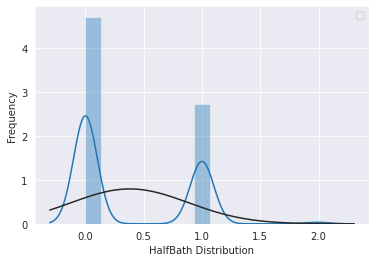

In [102]:
# nilai kurtosis dan skew untuk melihat kecondongan kurva distribusi
print( 'Nilai kurtosis dari HalfBath : {}'.format( kurtosis(all_data["HalfBath"]) ))
print( 'Nilai skew dari HalfBath     : {}'.format( skew(all_data["HalfBath"]) ))

# bandingkan bentuk distribusi dari SalePrice dengan kurva distribusi normal yang baik
(mu, sigma) = norm.fit(all_data["HalfBath"])
print("\n mu = {:.5f} and sigma = {:.5f}\n". format(mu, sigma))

plt.legend(["Normal Distribution. ($\mu_$ {:.5f}) and $\sigma_$ {:.5f}". format (mu, sigma)], loc ='best')
sns.distplot(all_data["HalfBath"], fit=norm)
plt.ylabel('Frequency')
plt.xlabel('HalfBath Distribution')
plt.show()

Dapat disimpulkan bahwa kurva HalfBath berbentuk Substansial Positif Skewness

Nilai kurtosis dari BsmtFullBath : -0.7353093587470014
Nilai skew dari BsmtFullBath     : 0.6248321135450657

 mu = 0.42960 and sigma = 0.52459



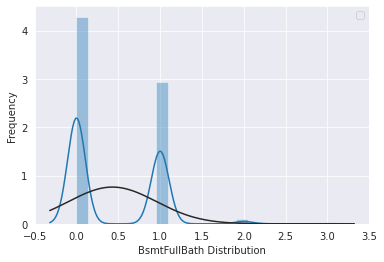

In [103]:
# nilai kurtosis dan skew untuk melihat kecondongan kurva distribusi
print( 'Nilai kurtosis dari BsmtFullBath : {}'.format( kurtosis(all_data["BsmtFullBath"]) ))
print( 'Nilai skew dari BsmtFullBath     : {}'.format( skew(all_data["BsmtFullBath"]) ))

# bandingkan bentuk distribusi dari SalePrice dengan kurva distribusi normal yang baik
(mu, sigma) = norm.fit(all_data["BsmtFullBath"])
print("\n mu = {:.5f} and sigma = {:.5f}\n". format(mu, sigma))

plt.legend(["Normal Distribution. ($\mu_$ {:.5f}) and $\sigma_$ {:.5f}". format (mu, sigma)], loc ='best')
sns.distplot(all_data["BsmtFullBath"], fit=norm)
plt.ylabel('Frequency')
plt.xlabel('BsmtFullBath Distribution')
plt.show()

Dapat disimpulkan bahwa kurva BsmtFullBath berbentuk Substansial Positif Skewness

Nilai kurtosis dari OverallCond : 1.474859586340287
Nilai skew dari OverallCond     : 0.5703120502855311

 mu = 4.56458 and sigma = 1.11294



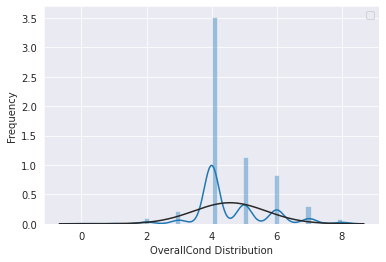

In [104]:
# nilai kurtosis dan skew untuk melihat kecondongan kurva distribusi
print( 'Nilai kurtosis dari OverallCond : {}'.format( kurtosis(all_data["OverallCond"]) ))
print( 'Nilai skew dari OverallCond     : {}'.format( skew(all_data["OverallCond"]) ))

# bandingkan bentuk distribusi dari SalePrice dengan kurva distribusi normal yang baik
(mu, sigma) = norm.fit(all_data["OverallCond"])
print("\n mu = {:.5f} and sigma = {:.5f}\n". format(mu, sigma))

plt.legend(["Normal Distribution. ($\mu_$ {:.5f}) and $\sigma_$ {:.5f}". format (mu, sigma)], loc ='best')
sns.distplot(all_data["OverallCond"], fit=norm)
plt.ylabel('Frequency')
plt.xlabel('OverallCond Distribution')
plt.show()

Dapat disimpulkan bahwa kurva TotRmsAbvGrd berbentuk moderate Positif Skewness

In [105]:
# panggil skewness bernilai negatif
skewness_negatif

,skew
YearBuilt,-0.599806
LotShape,-0.617690
MoSold,-0.645257
BsmtExposure,-1.216562
BsmtQual,-1.297560
KitchenQual,-1.448023
ExterQual,-1.801409
Fence,-1.993777
ExterCond,-2.497719
PavedDrive,-2.979084


Nilai kurtosis dari YearBuilt	 : -0.5124966682803427
Nilai skew dari YearBuilt	     : -0.5998055475020266

 mu = 1971.31278 and sigma = 30.28625



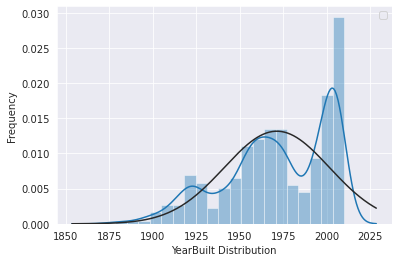

In [106]:
# nilai kurtosis dan skew untuk melihat kecondongan kurva distribusi
print( 'Nilai kurtosis dari YearBuilt	 : {}'.format( kurtosis(all_data["YearBuilt"]) ))
print( 'Nilai skew dari YearBuilt	     : {}'.format( skew(all_data["YearBuilt"]) ))

# bandingkan bentuk distribusi dari SalePrice dengan kurva distribusi normal yang baik
(mu, sigma) = norm.fit(all_data["YearBuilt"])
print("\n mu = {:.5f} and sigma = {:.5f}\n". format(mu, sigma))

plt.legend(["Normal Distribution. ($\mu_$ {:.5f}) and $\sigma_$ {:.5f}". format (mu, sigma)], loc ='best')
sns.distplot(all_data["YearBuilt"], fit=norm)
plt.ylabel('Frequency')
plt.xlabel('YearBuilt Distribution')
plt.show()

Dapat disimpulkan bahwa kurva YearBuilt berbentuk Moderate Negatif Skewness

Nilai kurtosis dari LotShape	 : -1.5878261576081427
Nilai skew dari LotShape	     : -0.6176898424874402

 mu = 1.94758 and sigma = 1.40948



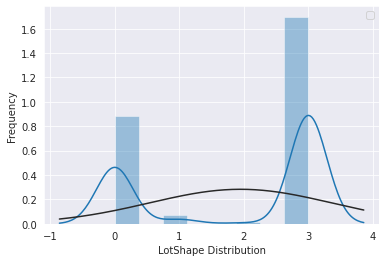

In [107]:
# nilai kurtosis dan skew untuk melihat kecondongan kurva distribusi
print( 'Nilai kurtosis dari LotShape	 : {}'.format( kurtosis(all_data["LotShape"]) ))
print( 'Nilai skew dari LotShape	     : {}'.format( skew(all_data["LotShape"]) ))

# bandingkan bentuk distribusi dari SalePrice dengan kurva distribusi normal yang baik
(mu, sigma) = norm.fit(all_data["LotShape"])
print("\n mu = {:.5f} and sigma = {:.5f}\n". format(mu, sigma))

plt.legend(["Normal Distribution. ($\mu_$ {:.5f}) and $\sigma_$ {:.5f}". format (mu, sigma)], loc ='best')
sns.distplot(all_data["LotShape"], fit=norm)
plt.ylabel('Frequency')
plt.xlabel('LotShape Distribution')
plt.show()

Dapat disimpulkan bahwa kurva LotShape berbentuk Moderate Negatif Skewness

Nilai kurtosis dari MoSold	 : -0.5110964871844978
Nilai skew dari MoSold	     : -0.6452566221498611

 mu = 6.50874 and sigma = 2.98630



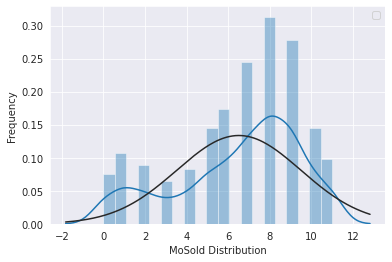

In [108]:
# nilai kurtosis dan skew untuk melihat kecondongan kurva distribusi
print( 'Nilai kurtosis dari MoSold	 : {}'.format( kurtosis(all_data["MoSold"]) ))
print( 'Nilai skew dari MoSold	     : {}'.format( skew(all_data["MoSold"]) ))

# bandingkan bentuk distribusi dari SalePrice dengan kurva distribusi normal yang baik
(mu, sigma) = norm.fit(all_data["MoSold"])
print("\n mu = {:.5f} and sigma = {:.5f}\n". format(mu, sigma))

plt.legend(["Normal Distribution. ($\mu_$ {:.5f}) and $\sigma_$ {:.5f}". format (mu, sigma)], loc ='best')
sns.distplot(all_data["MoSold"], fit=norm)
plt.ylabel('Frequency')
plt.xlabel('MoSold Distribution')
plt.show()

Dapat disimpulkan bahwa kurva MoSold berbentuk Moderate Negatif Skewness

Nilai kurtosis dari BsmtExposure	 : -0.19639385773222795
Nilai skew dari BsmtExposure	     : -1.2165615387532636

 mu = 2.29942 and sigma = 1.12164



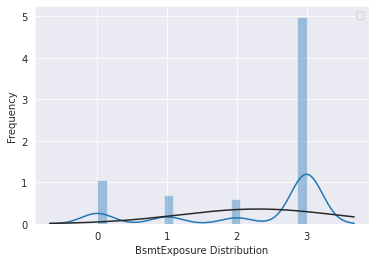

In [109]:
# nilai kurtosis dan skew untuk melihat kecondongan kurva distribusi
print( 'Nilai kurtosis dari BsmtExposure	 : {}'.format( kurtosis(all_data["BsmtExposure"]) ))
print( 'Nilai skew dari BsmtExposure	     : {}'.format( skew(all_data["BsmtExposure"]) ))

# bandingkan bentuk distribusi dari SalePrice dengan kurva distribusi normal yang baik
(mu, sigma) = norm.fit(all_data["BsmtExposure"])
print("\n mu = {:.5f} and sigma = {:.5f}\n". format(mu, sigma))

plt.legend(["Normal Distribution. ($\mu_$ {:.5f}) and $\sigma_$ {:.5f}". format (mu, sigma)], loc ='best')
sns.distplot(all_data["BsmtExposure"], fit=norm)
plt.ylabel('Frequency')
plt.xlabel('BsmtExposure Distribution')
plt.show()

Dapat disimpulkan bahwa kurva TotRmsAbvGrd berbentuk Substansian Negatif Skewness

Nilai kurtosis dari BsmtQual	 : 1.1166713663956997
Nilai skew dari BsmtQual	     : -1.297560432757404

 mu = 2.26036 and sigma = 0.88498



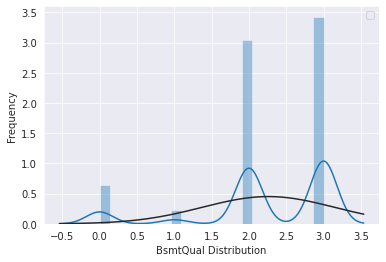

In [110]:
# nilai kurtosis dan skew untuk melihat kecondongan kurva distribusi
print( 'Nilai kurtosis dari BsmtQual	 : {}'.format( kurtosis(all_data["BsmtQual"]) ))
print( 'Nilai skew dari BsmtQual	     : {}'.format( skew(all_data["BsmtQual"]) ))

# bandingkan bentuk distribusi dari SalePrice dengan kurva distribusi normal yang baik
(mu, sigma) = norm.fit(all_data["BsmtQual"])
print("\n mu = {:.5f} and sigma = {:.5f}\n". format(mu, sigma))

plt.legend(["Normal Distribution. ($\mu_$ {:.5f}) and $\sigma_$ {:.5f}". format (mu, sigma)], loc ='best')
sns.distplot(all_data["BsmtQual"], fit=norm)
plt.ylabel('Frequency')
plt.xlabel('BsmtQual Distribution')
plt.show()

Dapat disimpulkan bahwa kurva BsmtQual berbentuk Substansian Negatif Skewness

Nilai kurtosis dari KitchenQual	  : 1.7668153827958148
Nilai skew dari KitchenQual	     : -1.4480234175906999

 mu = 2.34704 and sigma = 0.83423



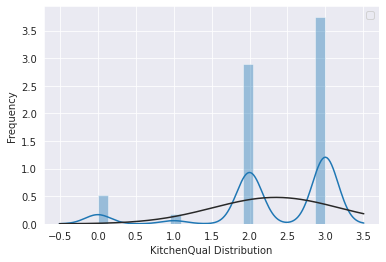

In [111]:
# nilai kurtosis dan skew untuk melihat kecondongan kurva distribusi
print( 'Nilai kurtosis dari KitchenQual	  : {}'.format( kurtosis(all_data["KitchenQual"]) ))
print( 'Nilai skew dari KitchenQual	     : {}'.format( skew(all_data["KitchenQual"]) ))

# bandingkan bentuk distribusi dari SalePrice dengan kurva distribusi normal yang baik
(mu, sigma) = norm.fit(all_data["KitchenQual"])
print("\n mu = {:.5f} and sigma = {:.5f}\n". format(mu, sigma))

plt.legend(["Normal Distribution. ($\mu_$ {:.5f}) and $\sigma_$ {:.5f}". format (mu, sigma)], loc ='best')
sns.distplot(all_data["KitchenQual"], fit=norm)
plt.ylabel('Frequency')
plt.xlabel('KitchenQual Distribution')
plt.show()

Dapat disimpulkan bahwa kurva KitchenQual berbentuk Substansian Negatif Skewness

Nilai kurtosis dari ExterQual	  : 3.6895156766997212
Nilai skew dari ExterQual	     : -1.8014087537463677

 mu = 2.53066 and sigma = 0.70212



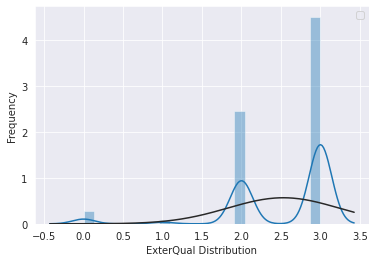

In [112]:
# nilai kurtosis dan skew untuk melihat kecondongan kurva distribusi
print( 'Nilai kurtosis dari ExterQual	  : {}'.format( kurtosis(all_data["ExterQual"]) ))
print( 'Nilai skew dari ExterQual	     : {}'.format( skew(all_data["ExterQual"]) ))

# bandingkan bentuk distribusi dari SalePrice dengan kurva distribusi normal yang baik
(mu, sigma) = norm.fit(all_data["ExterQual"])
print("\n mu = {:.5f} and sigma = {:.5f}\n". format(mu, sigma))

plt.legend(["Normal Distribution. ($\mu_$ {:.5f}) and $\sigma_$ {:.5f}". format (mu, sigma)], loc ='best')
sns.distplot(all_data["ExterQual"], fit=norm)
plt.ylabel('Frequency')
plt.xlabel('ExterQual Distribution')
plt.show()

Dapat disimpulkan bahwa kurva ExterQual berbentuk Substansian Negatif Skewness

Nilai kurtosis dari Fence	  : 2.7275373424785077
Nilai skew dari Fence	     : -1.9937767432509939

 mu = 3.49366 and sigma = 1.09119



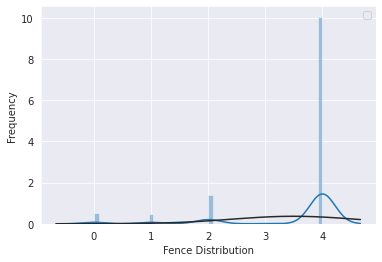

In [113]:
# nilai kurtosis dan skew untuk melihat kecondongan kurva distribusi
print( 'Nilai kurtosis dari Fence	  : {}'.format( kurtosis(all_data["Fence"]) ))
print( 'Nilai skew dari Fence	     : {}'.format( skew(all_data["Fence"]) ))

# bandingkan bentuk distribusi dari SalePrice dengan kurva distribusi normal yang baik
(mu, sigma) = norm.fit(all_data["Fence"])
print("\n mu = {:.5f} and sigma = {:.5f}\n". format(mu, sigma))

plt.legend(["Normal Distribution. ($\mu_$ {:.5f}) and $\sigma_$ {:.5f}". format (mu, sigma)], loc ='best')
sns.distplot(all_data["Fence"], fit=norm)
plt.ylabel('Frequency')
plt.xlabel('Fence Distribution')
plt.show()

Dapat disimpulkan bahwa kurva Fence berbentuk Moderate Negatif Skewness

Nilai kurtosis dari ExterCond	: 5.08290670919515
Nilai skew dari ExterCond	     : -2.4977186495941583

 mu = 3.70880 and sigma = 0.77351



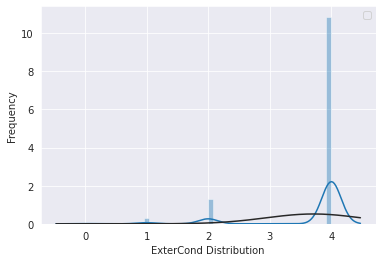

In [114]:
# nilai kurtosis dan skew untuk melihat kecondongan kurva distribusi
print( 'Nilai kurtosis dari ExterCond	: {}'.format( kurtosis(all_data["ExterCond"]) ))
print( 'Nilai skew dari ExterCond	     : {}'.format( skew(all_data["ExterCond"]) ))

# bandingkan bentuk distribusi dari SalePrice dengan kurva distribusi normal yang baik
(mu, sigma) = norm.fit(all_data["ExterCond"])
print("\n mu = {:.5f} and sigma = {:.5f}\n". format(mu, sigma))

plt.legend(["Normal Distribution. ($\mu_$ {:.5f}) and $\sigma_$ {:.5f}". format (mu, sigma)], loc ='best')
sns.distplot(all_data["ExterCond"], fit=norm)
plt.ylabel('Frequency')
plt.xlabel('ExterCond Distribution')
plt.show()

Dapat disimpulkan bahwa kurva ExterCond berbentuk Substansial Negatif Skewness

Nilai kurtosis dari PavedDrive 	: 7.111601495441816
Nilai skew dari PavedDrive	     : -2.979084192496615

 mu = 1.83076 and sigma = 0.53721



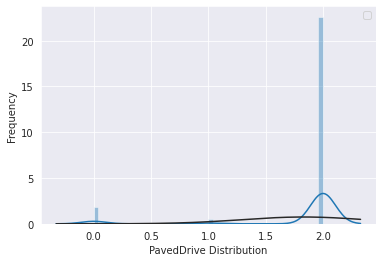

In [115]:
# nilai kurtosis dan skew untuk melihat kecondongan kurva distribusi
print( 'Nilai kurtosis dari PavedDrive 	: {}'.format( kurtosis(all_data["PavedDrive"]) ))
print( 'Nilai skew dari PavedDrive	     : {}'.format( skew(all_data["PavedDrive"]) ))

# bandingkan bentuk distribusi dari SalePrice dengan kurva distribusi normal yang baik
(mu, sigma) = norm.fit(all_data["PavedDrive"])
print("\n mu = {:.5f} and sigma = {:.5f}\n". format(mu, sigma))

plt.legend(["Normal Distribution. ($\mu_$ {:.5f}) and $\sigma_$ {:.5f}". format (mu, sigma)], loc ='best')
sns.distplot(all_data["PavedDrive"], fit=norm)
plt.ylabel('Frequency')
plt.xlabel('PavedDrive Distribution')
plt.show()

Dapat disimpulkan bahwa kurva PavedDrive berbentuk Substansial Negatif Skewness

Nilai kurtosis dari BsmtFinType2 	: 11.329641674909901
Nilai skew dari BsmtFinType2	     : -3.4579706278209983

 mu = 4.68722 and sigma = 0.99009



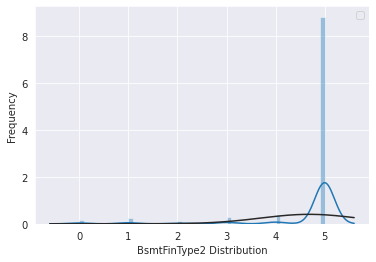

In [116]:
# nilai kurtosis dan skew untuk melihat kecondongan kurva distribusi
print( 'Nilai kurtosis dari BsmtFinType2 	: {}'.format( kurtosis(all_data["BsmtFinType2"]) ))
print( 'Nilai skew dari BsmtFinType2	     : {}'.format( skew(all_data["BsmtFinType2"]) ))

# bandingkan bentuk distribusi dari SalePrice dengan kurva distribusi normal yang baik
(mu, sigma) = norm.fit(all_data["BsmtFinType2"])
print("\n mu = {:.5f} and sigma = {:.5f}\n". format(mu, sigma))

plt.legend(["Normal Distribution. ($\mu_$ {:.5f}) and $\sigma_$ {:.5f}". format (mu, sigma)], loc ='best')
sns.distplot(all_data["BsmtFinType2"], fit=norm)
plt.ylabel('Frequency')
plt.xlabel('BsmtFinType2 Distribution')
plt.show()

Dapat disimpulkan bahwa kurva BsmtFinType2 berbentuk Substansial Negatif Skewness

Nilai kurtosis dari CentralAir 	: 9.964836577304442
Nilai skew dari CentralAir	     : -3.4590224886959673

 mu = 0.93285 and sigma = 0.25028



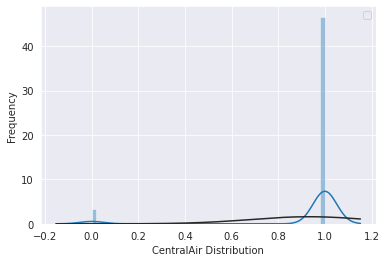

In [117]:
# nilai kurtosis dan skew untuk melihat kecondongan kurva distribusi
print( 'Nilai kurtosis dari CentralAir 	: {}'.format( kurtosis(all_data["CentralAir"]) ))
print( 'Nilai skew dari CentralAir	     : {}'.format( skew(all_data["CentralAir"]) ))

# bandingkan bentuk distribusi dari SalePrice dengan kurva distribusi normal yang baik
(mu, sigma) = norm.fit(all_data["CentralAir"])
print("\n mu = {:.5f} and sigma = {:.5f}\n". format(mu, sigma))

plt.legend(["Normal Distribution. ($\mu_$ {:.5f}) and $\sigma_$ {:.5f}". format (mu, sigma)], loc ='best')
sns.distplot(all_data["CentralAir"], fit=norm)
plt.ylabel('Frequency')
plt.xlabel('CentralAir Distribution')
plt.show()

Dapat disimpulkan bahwa kurva CentralAir berbentuk Substansial Negatif Skewness

Nilai kurtosis dari Functional 	: 16.230462950666134
Nilai skew dari Functional	     : -4.055757334740552

 mu = 5.75985 and sigma = 0.93515



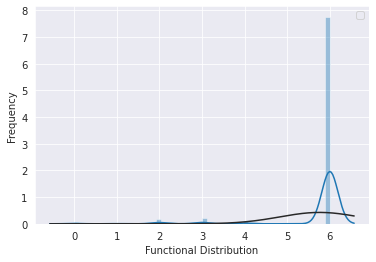

In [118]:
# nilai kurtosis dan skew untuk melihat kecondongan kurva distribusi
print( 'Nilai kurtosis dari Functional 	: {}'.format( kurtosis(all_data["Functional"]) ))
print( 'Nilai skew dari Functional	     : {}'.format( skew(all_data["Functional"]) ))

# bandingkan bentuk distribusi dari SalePrice dengan kurva distribusi normal yang baik
(mu, sigma) = norm.fit(all_data["Functional"])
print("\n mu = {:.5f} and sigma = {:.5f}\n". format(mu, sigma))

plt.legend(["Normal Distribution. ($\mu_$ {:.5f}) and $\sigma_$ {:.5f}". format (mu, sigma)], loc ='best')
sns.distplot(all_data["Functional"], fit=norm)
plt.ylabel('Frequency')
plt.xlabel('Functional Distribution')
plt.show()

Dapat disimpulkan bahwa kurva Functional berbentuk Substansial Negatif Skewness

Nilai kurtosis dari GarageQual 	: 15.518018199579842
Nilai skew dari GarageQual	     : -4.146230889434154

 mu = 3.85029 and sigma = 0.64106



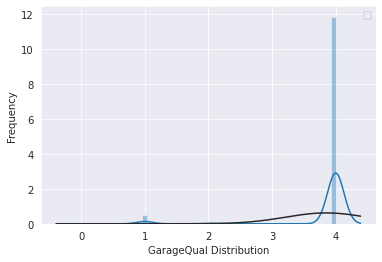

In [119]:
# nilai kurtosis dan skew untuk melihat kecondongan kurva distribusi
print( 'Nilai kurtosis dari GarageQual 	: {}'.format( kurtosis(all_data["GarageQual"]) ))
print( 'Nilai skew dari GarageQual	     : {}'.format( skew(all_data["GarageQual"]) ))

# bandingkan bentuk distribusi dari SalePrice dengan kurva distribusi normal yang baik
(mu, sigma) = norm.fit(all_data["GarageQual"])
print("\n mu = {:.5f} and sigma = {:.5f}\n". format(mu, sigma))

plt.legend(["Normal Distribution. ($\mu_$ {:.5f}) and $\sigma_$ {:.5f}". format (mu, sigma)], loc ='best')
sns.distplot(all_data["GarageQual"], fit=norm)
plt.ylabel('Frequency')
plt.xlabel('GarageQual Distribution')
plt.show()

Dapat disimpulkan bahwa kurva GarageQual berbentuk Substansial Negatif Skewness

Nilai kurtosis dari GarageCond 	: 28.070731620187274
Nilai skew dari GarageCond	     : -5.40899971247409

 mu = 3.90476 and sigma = 0.51077



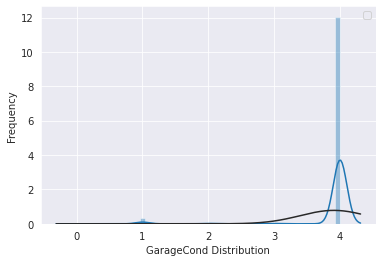

In [120]:
# nilai kurtosis dan skew untuk melihat kecondongan kurva distribusi
print( 'Nilai kurtosis dari GarageCond 	: {}'.format( kurtosis(all_data["GarageCond"]) ))
print( 'Nilai skew dari GarageCond	     : {}'.format( skew(all_data["GarageCond"]) ))

# bandingkan bentuk distribusi dari SalePrice dengan kurva distribusi normal yang baik
(mu, sigma) = norm.fit(all_data["GarageCond"])
print("\n mu = {:.5f} and sigma = {:.5f}\n". format(mu, sigma))

plt.legend(["Normal Distribution. ($\mu_$ {:.5f}) and $\sigma_$ {:.5f}". format (mu, sigma)], loc ='best')
sns.distplot(all_data["GarageCond"], fit=norm)
plt.ylabel('Frequency')
plt.xlabel('GarageCond Distribution')
plt.show()

Dapat disimpulkan bahwa kurva GarageCond berbentuk Substansial Negatif Skewness

Nilai kurtosis dari Street 	: 238.2541279669761
Nilai skew dari Street	    : -15.500133159653048

 mu = 0.99589 and sigma = 0.06399



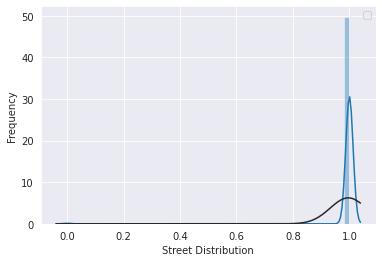

In [121]:
# nilai kurtosis dan skew untuk melihat kecondongan kurva distribusi
print( 'Nilai kurtosis dari Street 	: {}'.format( kurtosis(all_data["Street"]) ))
print( 'Nilai skew dari Street	    : {}'.format( skew(all_data["Street"]) ))

# bandingkan bentuk distribusi dari SalePrice dengan kurva distribusi normal yang baik
(mu, sigma) = norm.fit(all_data["Street"])
print("\n mu = {:.5f} and sigma = {:.5f}\n". format(mu, sigma))

plt.legend(["Normal Distribution. ($\mu_$ {:.5f}) and $\sigma_$ {:.5f}". format (mu, sigma)], loc ='best')
sns.distplot(all_data["Street"], fit=norm)
plt.ylabel('Frequency')
plt.xlabel('Street Distribution')
plt.show()

Dapat disimpulkan bahwa kurva Street berbentuk Substansial Negatif Skewness

Nilai kurtosis dari PoolQC 	: 451.25638379324477
Nilai skew dari PoolQC	    : -20.723993798121324

 mu = 2.99315 and sigma = 0.12805



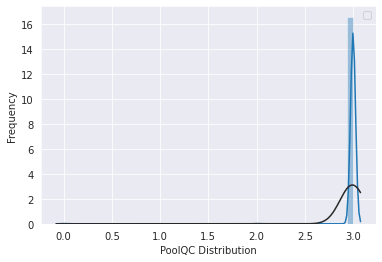

In [122]:
# nilai kurtosis dan skew untuk melihat kecondongan kurva distribusi
print( 'Nilai kurtosis dari PoolQC 	: {}'.format( kurtosis(all_data["PoolQC"]) ))
print( 'Nilai skew dari PoolQC	    : {}'.format( skew(all_data["PoolQC"]) ))

# bandingkan bentuk distribusi dari SalePrice dengan kurva distribusi normal yang baik
(mu, sigma) = norm.fit(all_data["PoolQC"])
print("\n mu = {:.5f} and sigma = {:.5f}\n". format(mu, sigma))

plt.legend(["Normal Distribution. ($\mu_$ {:.5f}) and $\sigma_$ {:.5f}". format (mu, sigma)], loc ='best')
sns.distplot(all_data["PoolQC"], fit=norm)
plt.ylabel('Frequency')
plt.xlabel('PoolQC Distribution')
plt.show()

Dapat disimpulkan bahwa kurva PoolQC berbentuk Substansial Negatif Skewness

## Transform feature skewness

#### transform feature numerik skew

In [123]:
all_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSF
0,1,10,RL,65.0,8450,1,2,3,Lvl,AllPub,Inside,0,CollgCr,Norm,Norm,1Fam,2Story,7,4,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,2,4,PConc,2,TA,3,2,706.0,5,0.0,150.0,856.0,GasA,...,1,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,2,8,6,0,2,Attchd,2003.0,1,2.0,548.0,4,4,2,0,61,0,0,0,0,3,4,NaN,0,4,2,WD,Normal,2566.0
1,2,5,RL,80.0,9600,1,2,3,Lvl,AllPub,FR2,0,Veenker,Feedr,Norm,1Fam,1Story,6,7,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,4,CBlock,2,TA,1,0,978.0,5,0.0,284.0,1262.0,GasA,...,1,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,3,6,6,1,4,Attchd,1976.0,1,2.0,460.0,4,4,2,298,0,0,0,0,0,3,4,NaN,0,7,1,WD,Normal,2524.0
2,3,10,RL,68.0,11250,1,2,0,Lvl,AllPub,Inside,0,CollgCr,Norm,Norm,1Fam,2Story,7,4,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,2,4,PConc,2,TA,2,2,486.0,5,0.0,434.0,920.0,GasA,...,1,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,2,6,6,1,4,Attchd,2001.0,1,2.0,608.0,4,4,2,0,42,0,0,0,0,3,4,NaN,0,11,2,WD,Normal,2706.0
3,4,11,RL,60.0,9550,1,2,0,Lvl,AllPub,Corner,0,Crawfor,Norm,Norm,1Fam,2Story,7,4,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,3,4,BrkTil,3,Gd,3,0,216.0,5,0.0,540.0,756.0,GasA,...,1,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,2,7,6,1,2,Detchd,1998.0,2,3.0,642.0,4,4,2,0,35,272,0,0,0,3,4,NaN,0,4,0,WD,Abnorml,2473.0
4,5,10,RL,84.0,14260,1,2,0,Lvl,AllPub,FR2,0,NoRidge,Norm,Norm,1Fam,2Story,8,4,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,2,4,PConc,2,TA,0,2,655.0,5,0.0,490.0,1145.0,GasA,...,1,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,2,9,6,1,4,Attchd,2000.0,1,3.0,836.0,4,4,2,192,84,0,0,0,0,3,4,NaN,0,3,2,WD,Normal,3343.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,2,RM,21.0,1936,1,2,3,Lvl,AllPub,Inside,0,MeadowV,Norm,Norm,Twnhs,2Story,4,6,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,3,4,CBlock,3,TA,3,5,0.0,5,0.0,546.0,546.0,GasA,...,1,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,3,5,6,0,2,Attchd,1979.0,2,0.0,0.0,4,4,2,0,0,0,0,0,0,3,4,NaN,0,8,0,WD,Normal,1638.0
2915,2916,2,RM,21.0,1894,1,2,3,Lvl,AllPub,Inside,0,MeadowV,Norm,Norm,TwnhsE,2Story,4,4,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,3,4,CBlock,3,TA,3,4,252.0,5,0.0,294.0,546.0,GasA,...,1,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,3,6,6,0,2,CarPort,1970.0,2,1.0,286.0,4,4,2,0,24,0,0,0,0,3,4,NaN,0,6,0,WD,Abnorml,1638.0
2916,2917,5,RL,160.0,20000,1,2,3,Lvl,AllPub,Inside,0,Mitchel,Norm,Norm,1Fam,1Story,5,6,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,4,CBlock,3,TA,3,0,1224.0,5,0.0,0.0,1224.0,GasA,...,1,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,3,7,6,1,4,Detchd,1960.0,2,2.0,576.0,4,4,2,474,0,0,0,0,0,3,4,NaN,0,11,0,WD,Abnorml,2448.0
2917,2918,14,RL,62.0,10441,1,2,3,Lvl,AllPub,Inside,0,Mitchel,Norm,Norm,1Fam,SFoyer,5,4,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,3,4,PConc,2,TA,0,2,337.0,5,0.0,575.0,912.0,GasA,...,1,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,3,6,6,0,2,Attchd,1979.0,2,0.0,0.0,4,4,2,80,32,0,0,0,0,3,2,Shed,700,9,0,WD,Normal,1882.0


In [124]:
skewness = skewness[abs(skewness) > 0.50]
print("jumlah feature skewness yang harus ditransformasi yaitu : ", skewness.shape[0])

jumlah feature skewness yang harus ditransformasi yaitu :  58


In [125]:
numerik = all_data.dtypes[all_data.dtypes != "object"].index
print("Jumlah data numerik yang harus ditranspose yaitu : ", len(numerik))

Jumlah data numerik yang harus ditranspose yaitu :  58


#### Catatan :
Jika didalam variabel bebas (feature) terdapat satu variabel numerik yang harus di transpose, maka seluruh variabel numeriknya harus di transpose juga.

## Tranpose Data
Semua data numerik akan ditransposekan menggunakan metode BoxCox, dimana akan digunakan lamda=0.15 dan model akan ditransformasikan kedalam bentuk log(x+1) atau dalam metode BoxCox sama dengan boxcox1p.

In [126]:
# transformasi BoxCox
from scipy.special import boxcox1p
skewed_feature = skewness.index
lamda = 0.15
for feat in skewed_feature:
    all_data[feat] = boxcox1p(all_data[feat], lamda)

In [127]:
# recek data yg telah ditranspose
all_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSF
0,0.730463,2.885846,RL,5.831328,19.212182,0.730463,1.194318,1.540963,Lvl,AllPub,Inside,0.0,CollgCr,Norm,Norm,1Fam,2Story,7,1.820334,14.187527,14.187527,Gable,CompShg,VinylSd,VinylSd,BrkFace,8.059126,1.194318,1.820334,PConc,1.194318,TA,1.540963,1.194318,11.170327,2.055642,0.0,7.483296,11.692623,GasA,...,0.730463,SBrkr,11.692623,11.686189,0.0,13.698888,0.730463,0.000000,1.194318,0.730463,1.540963,0.730463,1.194318,2.602594,2.259674,0.000000,1.194318,Attchd,14.187527,0.730463,1.194318,10.506271,1.820334,1.820334,1.194318,0.000000,5.714669,0.000000,0.0,0.0,0.0,1.540963,1.820334,NaN,0.0,1.820334,1.194318,WD,Normal,14.976591
1,1.194318,2.055642,RL,6.221214,19.712205,0.730463,1.194318,1.540963,Lvl,AllPub,FR2,0.0,Veenker,Feedr,Norm,1Fam,1Story,6,2.440268,14.145138,14.145138,Gable,CompShg,MetalSd,MetalSd,None,0.000000,1.540963,1.820334,CBlock,1.194318,TA,0.730463,0.000000,12.062832,2.055642,0.0,8.897844,12.792276,GasA,...,0.730463,SBrkr,12.792276,0.000000,0.0,12.792276,0.000000,0.730463,1.194318,0.000000,1.540963,0.730463,1.540963,2.259674,2.259674,0.730463,1.820334,Attchd,14.145138,0.730463,1.194318,10.062098,1.820334,1.820334,1.194318,9.010206,0.000000,0.000000,0.0,0.0,0.0,1.540963,1.820334,NaN,0.0,2.440268,0.730463,WD,Normal,14.923100
2,1.540963,2.885846,RL,5.914940,20.347241,0.730463,1.194318,0.000000,Lvl,AllPub,Inside,0.0,CollgCr,Norm,Norm,1Fam,2Story,7,1.820334,14.184404,14.185966,Gable,CompShg,VinylSd,VinylSd,BrkFace,7.646538,1.194318,1.820334,PConc,1.194318,TA,1.194318,1.194318,10.200343,2.055642,0.0,9.917060,11.892039,GasA,...,0.730463,SBrkr,11.892039,11.724598,0.0,13.832085,0.730463,0.000000,1.194318,0.730463,1.540963,0.730463,1.194318,2.259674,2.259674,0.730463,1.820334,Attchd,14.184404,0.730463,1.194318,10.775536,1.820334,1.820334,1.194318,0.000000,5.053371,0.000000,0.0,0.0,0.0,1.540963,1.820334,NaN,0.0,3.011340,1.194318,WD,Normal,15.149678
3,1.820334,3.011340,RL,5.684507,19.691553,0.730463,1.194318,0.000000,Lvl,AllPub,Corner,0.0,Crawfor,Norm,Norm,1Fam,2Story,7,1.820334,14.047529,14.135652,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000000,1.540963,1.820334,BrkTil,1.540963,Gd,1.540963,0.000000,8.274266,2.055642,0.0,10.468500,11.354094,GasA,...,0.730463,SBrkr,12.013683,11.354094,0.0,13.711364,0.730463,0.000000,0.730463,0.000000,1.540963,0.730463,1.194318,2.440268,2.259674,0.730463,1.194318,Detchd,14.179714,1.194318,1.540963,10.918253,1.820334,1.820334,1.194318,0.000000,4.745132,8.797736,0.0,0.0,0.0,1.540963,1.820334,NaN,0.0,1.820334,0.000000,WD,Abnorml,14.857121
4,2.055642,2.885846,RL,6.314735,21.325160,0.730463,1.194318,0.000000,Lvl,AllPub,FR2,0.0,NoRidge,Norm,Norm,1Fam,2Story,8,1.820334,14.182841,14.182841,Gable,CompShg,VinylSd,VinylSd,BrkFace,9.391827,1.194318,1.820334,PConc,1.194318,TA,0.000000,1.194318,10.971129,2.055642,0.0,10.221051,12.510588,GasA,...,0.730463,SBrkr,12.510588,12.271365,0.0,14.480029,0.730463,0.000000,1.194318,0.730463,1.820334,0.730463,1.194318,2.750250,2.259674,0.730463,1.820334,Attchd,14.182841,0.730463,1.540963,11.627708,1.820334,1.820334,1.194318,8.013884,6.314735,0.000000,0.0,0.0,0.0,1.540963,1.820334,NaN,0.0,1.540963,1.194318,WD,Normal,15.852312


#### Hapus feauture missing value terbanyak 
'Alley', 'PoolQC', 'Fence', 'MiscFeature' dan Id


In [128]:
# hapus featur yang memiliki missing value sangat banyak yaitu Alley, PoolQC, Fence dan MiscFeature
all_data.drop(['Id', 'Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)

### Ubah Variabel Kategorikal Menjadi Variabel Numerikal
mengubah variabel kategorikal menjadi variabel numerikal dengan melakukan proses One-Hot-Encode terhadap variabel kategorikal. Bagi kamu yang belum tahu apa itu One-Hot-Encode, One-Hot-Encode adalah proses untuk membuat kolom baru dari variabel kategorikal kita di mana setiap kategori menjadi kolom baru dengan nilai 0 atau 1 (0 mewakili tidak ada dan 1 mewakili ada).

In [129]:
# mengconvert data kategorik menjadi numerik menggunakan get_dummies
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2919, 226)


In [130]:
# recek apakah masih terdapat data kategorik
all_data

,MSSubClass,LotFrontage,LotArea,Street,LotShape,LandSlope,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,2.885846,5.831328,19.212182,0.730463,1.540963,0.000000,1.820334,14.187527,14.187527,8.059126,1.194318,1.820334,1.194318,1.540963,1.194318,11.170327,2.055642,0.0,7.483296,11.692623,0.000000,0.730463,11.692623,11.686189,0.0,13.698888,0.730463,0.000000,1.194318,0.730463,1.540963,0.730463,1.194318,2.602594,2.259674,0.000000,1.194318,14.187527,0.730463,1.194318,...,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,2.055642,6.221214,19.712205,0.730463,1.540963,0.000000,2.440268,14.145138,14.145138,0.000000,1.540963,1.820334,1.194318,0.730463,0.000000,12.062832,2.055642,0.0,8.897844,12.792276,0.000000,0.730463,12.792276,0.000000,0.0,12.792276,0.000000,0.730463,1.194318,0.000000,1.540963,0.730463,1.540963,2.259674,2.259674,0.730463,1.820334,14.145138,0.730463,1.194318,...,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,2.885846,5.914940,20.347241,0.730463,0.000000,0.000000,1.820334,14.184404,14.185966,7.646538,1.194318,1.820334,1.194318,1.194318,1.194318,10.200343,2.055642,0.0,9.917060,11.892039,0.000000,0.730463,11.892039,11.724598,0.0,13.832085,0.730463,0.000000,1.194318,0.730463,1.540963,0.730463,1.194318,2.259674,2.259674,0.730463,1.820334,14.184404,0.730463,1.194318,...,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,3.011340,5.684507,19.691553,0.730463,0.000000,0.000000,1.820334,14.047529,14.135652,0.000000,1.540963,1.820334,1.540963,1.540963,0.000000,8.274266,2.055642,0.0,10.468500,11.354094,1.194318,0.730463,12.013683,11.354094,0.0,13.711364,0.730463,0.000000,0.730463,0.000000,1.540963,0.730463,1.194318,2.440268,2.259674,0.730463,1.194318,14.179714,1.194318,1.540963,...,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,2.885846,6.314735,21.325160,0.730463,0.000000,0.000000,1.820334,14.182841,14.182841,9.391827,1.194318,1.820334,1.194318,0.000000,1.194318,10.971129,2.055642,0.0,10.221051,12.510588,0.000000,0.730463,12.510588,12.271365,0.0,14.480029,0.730463,0.000000,1.194318,0.730463,1.820334,0.730463,1.194318,2.750250,2.259674,0.730463,1.820334,14.182841,0.730463,1.540963,...,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,1.194318,3.932510,14.081426,0.730463,1.540963,0.000000,2.259674,14.135652,14.135652,0.000000,1.540963,1.820334,1.540963,1.540963,2.055642,0.000000,2.055642,0.0,10.496872,10.496872,1.194318,0.730463,10.496872,10.496872,0.0,12.374860,0.000000,0.000000,0.730463,0.730463,1.540963,0.730463,1.540963,2.055642,2.259674,0.000000,1.194318,14.149872,1.194318,0.00000

#### Split Data
bagi all_data menjadi data train dan test

In [131]:
# membagi all_data menjadi data train dan test
train = all_data[:ntrain]
test = all_data[ntrain:]
print(len(train))
print(len(test))

1460
1459


In [132]:
# tampilkan data train
train

,MSSubClass,LotFrontage,LotArea,Street,LotShape,LandSlope,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,2.885846,5.831328,19.212182,0.730463,1.540963,0.0,1.820334,14.187527,14.187527,8.059126,1.194318,1.820334,1.194318,1.540963,1.194318,11.170327,2.055642,0.000000,7.483296,11.692623,0.000000,0.730463,11.692623,11.686189,0.0,13.698888,0.730463,0.000000,1.194318,0.730463,1.540963,0.730463,1.194318,2.602594,2.259674,0.000000,1.194318,14.187527,0.730463,1.194318,...,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,2.055642,6.221214,19.712205,0.730463,1.540963,0.0,2.440268,14.145138,14.145138,0.000000,1.540963,1.820334,1.194318,0.730463,0.000000,12.062832,2.055642,0.000000,8.897844,12.792276,0.000000,0.730463,12.792276,0.000000,0.0,12.792276,0.000000,0.730463,1.194318,0.000000,1.540963,0.730463,1.540963,2.259674,2.259674,0.730463,1.820334,14.145138,0.730463,1.194318,...,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,2.885846,5.914940,20.347241,0.730463,0.000000,0.0,1.820334,14.184404,14.185966,7.646538,1.194318,1.820334,1.194318,1.194318,1.194318,10.200343,2.055642,0.000000,9.917060,11.892039,0.000000,0.730463,11.892039,11.724598,0.0,13.832085,0.730463,0.000000,1.194318,0.730463,1.540963,0.730463,1.194318,2.259674,2.259674,0.730463,1.820334,14.184404,0.730463,1.194318,...,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,3.011340,5.684507,19.691553,0.730463,0.000000,0.0,1.820334,14.047529,14.135652,0.000000,1.540963,1.820334,1.540963,1.540963,0.000000,8.274266,2.055642,0.000000,10.468500,11.354094,1.194318,0.730463,12.013683,11.354094,0.0,13.711364,0.730463,0.000000,0.730463,0.000000,1.540963,0.730463,1.194318,2.440268,2.259674,0.730463,1.194318,14.179714,1.194318,1.540963,...,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,2.885846,6.314735,21.325160,0.730463,0.000000,0.0,1.820334,14.182841,14.182841,9.391827,1.194318,1.820334,1.194318,0.000000,1.194318,10.971129,2.055642,0.000000,10.221051,12.510588,0.000000,0.730463,12.510588,12.271365,0.0,14.480029,0.730463,0.000000,1.194318,0.730463,1.820334,0.730463,1.194318,2.750250,2.259674,0.730463,1.820334,14.182841,0.730463,1.540963,...,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,2.885846,5.744420,18.960528,0.730463,1.540963,0.0,1.820334,14.181278,14.182841,0.000000,1.540963,1.820334,1.194318,1.540963,2.055642,0.000000,2.055642,0.000000,11.990298,11.990298,0.000000,0.730463,11.990298,11.124583,0.0,13.584606,0.000000,0.000000,1.194318,0.730463,1.540963,0.730463,1.540963,2.440268,2.259674,0.730463,1.820334,14.181278,0.730463,1.19431

In [133]:
# tampilkan data test
test

,MSSubClass,LotFrontage,LotArea,Street,LotShape,LandSlope,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1460,2.055642,6.221214,20.479373,0.730463,1.540963,0.000000,2.055642,14.121376,14.121376,0.000000,1.540963,1.820334,1.540963,1.540963,1.820334,10.105326,1.540963,7.397498,8.780689,11.775114,1.820334,0.730463,11.818680,0.000000,0.0,11.818680,0.000000,0.000000,0.730463,0.000000,1.194318,0.730463,1.540963,2.055642,2.259674,0.000000,1.194318,14.121376,1.194318,0.730463,...,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1461,2.055642,6.244956,21.327220,0.730463,0.000000,0.000000,2.055642,14.116605,14.116605,6.808145,1.540963,1.820334,1.540963,1.540963,0.000000,11.901094,2.055642,0.000000,9.752379,12.943735,1.820334,0.730463,12.943735,0.000000,0.0,12.943735,0.000000,0.000000,0.730463,0.730463,1.540963,0.730463,1.194318,2.259674,2.259674,0.000000,1.194318,14.116605,1.194318,0.730463,...,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1462,2.885846,6.073289,21.196905,0.730463,0.000000,0.000000,1.820334,14.178149,14.179714,0.000000,1.540963,1.820334,1.194318,1.540963,1.194318,11.476685,2.055642,0.000000,7.293500,11.916131,1.194318,0.730463,11.916131,11.151348,0.0,13.551272,0.000000,0.000000,1.194318,0.730463,1.540963,0.730463,1.540963,2.259674,2.259674,0.730463,1.820334,14.178149,0.000000,1.194318,...,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1463,2.885846,6.172972,19.865444,0.730463,0.000000,0.000000,2.055642,14.179714,14.179714,3.858807,1.540963,1.820334,1.540963,1.540963,1.194318,10.749651,2.055642,0.000000,9.207511,11.910125,0.000000,0.730463,11.910125,11.062536,0.0,13.504453,0.000000,0.000000,1.194318,0.730463,1.540963,0.730463,1.194318,2.440268,2.259674,0.730463,1.194318,14.179714,0.000000,1.194318,...,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1464,0.000000,5.093857,17.257255,0.730463,0.000000,0.000000,1.820334,14.170316,14.170316,0.000000,1.194318,1.820334,1.194318,1.540963,0.000000,8.720170,2.055642,0.000000,12.172900,12.833625,0.000000,0.730463,12.833625,0.000000,0.0,12.833625,0.000000,0.000000,1.194318,0.000000,1.194318,0.730463,1.194318,2.055642,2.259674,0.000000,1.194318,14.170316,0.730463,1.194318,...,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,1.194318,3.932510,14.081426,0.730463,1.540963,0.000000,2.259674,14.135652,14.135652,0.000000,1.540963,1.820334,1.540963,1.540963,2.055642,0.000000,2.055642,0.000000,10.496872,10.496872,1.194318,0.730463,10.496872,10.496872,0.0,12.374860,0.000000,0.000000,0.730463,0.730463,1.540963,0.730463,1.540963,2.055642,2.259674,0.

In [134]:
# informasi tentang train
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 226 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(54), uint8(172)
memory usage: 861.3 KB


In [135]:
# informasi tentang test
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 1460 to 2918
Columns: 226 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(54), uint8(172)
memory usage: 860.7 KB


In [136]:
# ukuran train
train.shape

(1460, 226)

In [137]:
# ukran test
test.shape

(1459, 226)

# MODELING

In [138]:
# import fungsi yang diperlukan
from sklearn.linear_model import ElasticNet, Lasso, BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
import sklearn.metrics as metrics

### Cross Validation
Evaluasi kinerja monel dengan menggunakan cross validation

In [139]:
# fungsi validasi dengan menggunakan n_folds = 5
n_folds = 5

def rmsle_cv(model):
  kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
  rmse = np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
  
  return(rmse)

### Model Regresi
Buat prediksi dasar dengan menggunakan beberapa jenis model

In [140]:
# LASSO
lasso = make_pipeline(RobustScaler(), Lasso(alpha=0.0005, random_state=1))

# Elastic Net
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=0.9, random_state=3))

# Kernel Ridge
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

# Gradient Boosting
GBoost =GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=4, max_features='sqrt', 
                                  min_samples_leaf=15, min_samples_split=10,
                                  loss='huber', random_state=5)

# XGBoost
model_xgb = xgb.XGBRFRegressor(colsample_bytree=0.4603, gamma=0.0468, learning_rate=0.05,
                               max_depth=3, min_child_weight=1.7817, n_estimators=22000, 
                               reg_alpha=0.4640, reg_lambda=0.8571, subsample=0.5213,
                               silent=1, random_state=7, nthread=-1)

# LightGBM
model_lgb = lgb.LGBMRegressor(objective='regression', num_leaves=5, learning_rate=0.05, n_estimators=720,
                              max_bin= 55, bagging_fraction=0.8, bagging_freq=5, feature_fraction=0.2319,
                              fearture_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf=6, min_sum_hessian_in_leaf=11)

### Evaluasi model dengan menggunakan cross validation RMSLE Error
Evaluasi model yang dihasilkan dengan melihat rmsle nya

In [141]:
# Score LASSO
score1 = rmsle_cv(lasso)
print("LASSO Score mean: {:.4f} Score Std: {:.4f}\n ".format(score1.mean(), score1.std()))

#Score ENet
score2 = rmsle_cv(ENet)
print("ENet Score mean: {:.4f} Score Std: {:.4f}\n ".format(score2.mean(), score2.std()))

#Score ENet
score3 = rmsle_cv(KRR)
print("KRR Score mean: {:.4f} Score Std: {:.4f}\n ".format(score3.mean(), score3.std()))

#Score GBoost
score4 = rmsle_cv(GBoost)
print("GBoost Score mean: {:.4f} Score Std: {:.4f}\n ".format(score4.mean(), score4.std()))

#Score XGBoost
score5 = rmsle_cv(model_xgb)
print("XGBoost Score mean: {:.4f} Score Std: {:.4f}\n ".format(score5.mean(), score5.std()))

#Score LightGBoost
score6 = rmsle_cv(model_lgb)
print("Light GBOOST Score mean: {:.4f} Score Std: {:.4f}\n ".format(score6.mean(), score6.std()))

LASSO Score mean: 0.1235 Score Std: 0.0162
 
ENet Score mean: 0.1235 Score Std: 0.0163
 
KRR Score mean: 0.1244 Score Std: 0.0117
 
GBoost Score mean: 0.1249 Score Std: 0.0128
 
XGBoost Score mean: 10.9560 Score Std: 0.0186
 
Light GBOOST Score mean: 0.1231 Score Std: 0.0091
 


Kelas untuk mendefinisikan rata-rata score dari setiap model

In [142]:
# fungsi untuk menghitung rata-rata score hasil evaluasi model
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
  def  __init__(self, models):
    self.models = models

  # kloning model setiap model asli untuk di pasangkan / gunakan ke data
  def fit(self, X, y):
    self.models_ = [clone(x) for x in self.models]

    # training model yang telah dikloning
    for model in self.models_:
      model.fit(X, y)
    return self

  # lakukan prediksi rata-rata dari model yang telah dikloning
  def predict(self, X):
      predictions = np.column_stack([model.predict(X) for model in self.models_])
      return np.mean(predictions, axis=1)

In [143]:
# melihat score rata-rata dari seluruh model lasso, ENet, KRR, GBoost, model_xgb, model_lgb
averaged_models = AveragingModels(models = (lasso, ENet, KRR, GBoost, model_xgb, model_lgb))

In [144]:

# nilai scrore rata-rata dari keseluruhan model 
skor = rmsle_cv(averaged_models)
print("Score mean seluruh model: {:.4f} Score Std selutuh model: {:.4f}\n ".format(skor.mean(), skor.std()))

Score mean seluruh model: 1.8288 Score Std selutuh model: 0.0089
 


In [145]:
# fungsi stacking model untuk melatih meta model dengan n_folds = 5
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
  def __init__(self, base_models, meta_model, n_folds=5):
    self.base_models = base_models
    self.meta_model = meta_model
    self.n_folds = n_folds

  # fungsi untuk memasangkan data pada model kloning
  def fit(self, X, y):
    self.base_models_ = [list() for x in self.base_models]
    self.meta_model_ = clone(self.meta_model)
    kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)

    # training model kloning untuk menghasilkan prediksi out_of fold 
    out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
    for i, model in enumerate(self.base_models):
      for train_index, holdout_index in kfold.split(X, y):

        # training meta model
        instance = clone(model)
        self.base_models_[i].append(instance)
        instance.fit(X[train_index], y[train_index])
        y_pred = instance.predict(X[holdout_index])
        out_of_fold_predictions[holdout_index, i]= y_pred

    # training mmeta model yang telah dikloning dengan menggunakan prediksi out_of_fold
    self.meta_model_.fit(out_of_fold_predictions, y)
    return self
  
  def predict(self, X):
    meta_features = np.column_stack([
                  np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
                  for base_models in self.base_models_])
    return self.meta_model_.predict(meta_features)
  

In [146]:
# rata-rata skore stack model dari model asli Enet, GBoost, dan KRR dengan menggunakan meta model lasso
stack_averaged_model = StackingAveragedModels(base_models = (ENet, GBoost, KRR), meta_model=lasso)

In [147]:
# panggil fungsi rmsle untuk menghitung rata-rata score stack model
score = rmsle_cv(stack_averaged_model)
print("score rata-rata model  : {:.4f} dan std : {:.4}".format(score.mean(), score.std()))

score rata-rata model  : 0.1198 dan std : 0.01369


### Ensembling
menggunakan metode ensebling untuk meningkatkan pencapaian solusi prediksi yang lebih baik daripada algoritma yang bisa dan meningkatkan perfoma model

In [148]:
# hitung rmsle model 
def rmsle(y, y_pred):
  return np.sqrt(mean_squared_error(y, y_pred))

#### Stacked Model

In [149]:
stack_averaged_model.fit(train.values, y_train)
stack_train_prediction = stack_averaged_model.predict(train.values)
stacked_pred = np.expm1(stack_averaged_model.predict(test.values))
print(rmsle(y_train, stack_train_prediction))

0.08246722786588188


### XGBoost Model

In [150]:
model_xgb.fit(train.values, y_train)
xgb_train_prediction = model_xgb.predict(train.values)
xgb_pred = np.expm1(model_xgb.predict(test.values))
print(rmsle(y_train, xgb_train_prediction))

10.955810913424248


### Model LightGBM

In [151]:
model_lgb.fit(train.values, y_train)
lgb_train_prediction = model_lgb.predict(train.values)
lgb_pred = np.expm1(model_lgb.predict(test.values))
print(rmsle(y_train, lgb_train_prediction))

0.07659779714948715


#### Nilai rmse data train

In [152]:
# nilai rmsle dari model ensamble
print(rmsle(y_train, stack_train_prediction*0.70+xgb_train_prediction*0.15+lgb_train_prediction*0.15))

1.6455423639187408


#### Prediksi Ensamble

In [153]:
# model ensamble
ensemble = stacked_pred*0.70+xgb_pred*0.15+lgb_pred*0.15

#### Submission

In [154]:
# buat data frame baru yang berisi Id dan SalePrice
my_submit = pd.DataFrame()
my_submit['Id'] = test_id
my_submit['SalePrice'] = ensemble

In [155]:
# tampilkan data my_submit
my_submit

,Id,SalePrice
0,1461,101048.227806
1,1462,132008.608207
2,1463,160853.248258
3,1464,167763.909601
4,1465,161538.098309
...,...,...
1454,2915,72746.316062
1455,2916,71712.539609
1456,2917,143046.128618
1457,2918,100691.873637


In [156]:
# ukuran data my_submit
my_submit.shape

(1459, 2)

In [157]:
# simpan data my_submit 
my_submit.to_csv("Submission.csv")